# Análise dos Dados do Enem 2021

## Avalição da Nota Global

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

In [2]:
lista_features = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA','SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
       'Q014', 'Q019', 'Q022',
        'Q024', 'Q025']

In [3]:
%time Enem_21 = pd.read_csv('./MICRODADOS_ENEM_2021.csv', encoding='ISO-8859-1', sep=';', usecols=lista_features)
Enem_21.head()

CPU times: total: 22.3 s
Wall time: 29.1 s


,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q014,Q019,Q022,Q024,Q025
0,210053865474,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,574.6,472.6,NaN,1,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,B,B,B,B,B
1,210052384164,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,505.9,551.8,498.3,461.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,B,C,A,A
2,210052589243,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,A,B,C,B,B
3,210052128335,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,580.7,678.9,638.9,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,B,B,B,B
4,210051353021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,497.7,532.4,457.6,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,B,B,E,B,B


In [15]:
# Esta função cria um data frame com uma coluna com as Notas Normalizadas

def Nota_Scl (clmn_1, clmn_2, clmn_3, clmn_4, base ):
    scaler = MinMaxScaler()
    df = base.loc[(base.loc[:,clmn_1] != 0)]
    df = df[df[clmn_1].notnull()]
    df.reset_index(inplace=True, drop=True)
    df[["NOTA_SCL"]] = scaler.fit_transform(df[[clmn_1]])
    df = df.round({"NOTA_SCL":3})
    df.drop([clmn_1, clmn_2, clmn_3, clmn_4], axis=1, inplace=True)
    return df

In [27]:
DF_CH = Nota_Scl('NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', Enem_21)
DF_CH.shape

(2373747, 52)

In [16]:
DF_LC = Nota_Scl('NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', Enem_21)
DF_LC.shape

(2376131, 52)

In [28]:
DF_CN = Nota_Scl('NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', Enem_21)
DF_CN.shape

(2245451, 52)

In [29]:
DF_MT = Nota_Scl('NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', Enem_21)
DF_MT.shape

(2245391, 52)

In [ ]:
DF_GLBL = pd.concat([DF_CH, DF_LC, DF_CN, DF_MT], ignore_index= True)
DF_GLBL.shape

In [ ]:
DF_GLBL.to_csv('./GLOBAL_ENEM_2021.csv', index = False)

In [2]:
DF_GLBL = pd.read_csv('./GLOBAL_ENEM_2021.csv')
DF_GLBL.shape

(9240720, 52)

### Bibliotéca de Funções

<hr>

In [4]:
# Esta função gera um describe da nota, pelas classes da coluna desejada.

def Estat_Desc (clmn_1, clmn_2):
    
    Estat_Desc = pd.DataFrame()
    total = base[base[clmn_1].notnull()][coluna_1].count()
    count_percent = []
    
    
    for k, v in Dicionario_Labels.items():
        Estat_Desc[k] = base.loc[base.loc[:,clmn_1] == v, clmn_2].describe().round(2)
        percentagem = (base.loc[base.loc[:,clmn_1] == v,clmn_2].count() / total)*100
        count_percent.append(percentagem.round(2))
    
    Estat_Desc = Estat_Desc.T
    Estat_Desc.insert(loc = 1, column = 'count_%', value = count_percent)
    Estat_Desc = Estat_Desc.T
    
    print()
    print(titulo)
    return Estat_Desc

In [5]:
# Esta função gera um gráfico Boxplot da nota, pelas classes da coluna desejada.

def Box_Plot (clmn_1, clmn_2):
    
    lst_k = []
    lst_v = []
    
    for k, v in Dicionario_Labels.items():
        lst_k.append(k)
        lst_v.append(v)
        
    plt.figure(figsize=(15,5))
    sbn.boxplot(x=clmn_1, y=clmn_2, showmeans=True, data=base, showfliers=Outliers, order=lst_v)
    plt.title(titulo, fontsize=15)
    plt.xlabel(clmn_1, fontsize=12)
    plt.ylabel(clmn_2, fontsize=12)
    ticks, labels = plt.xticks()
    plt.xticks(ticks, labels=lst_k)
    plt.show

In [6]:
# Esta função gera gráficos de Histograma da nota, pelas classes da coluna desejada.

def Hist_Plot (clmn_1, clmn_2):
        
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    qtd_lnh = 2 if qtd_lnh == 1 else qtd_lnh
    fig, ax = plt.subplots(qtd_lnh, 2, figsize=(14,20), constrained_layout=True)
   
           
    count_k = -1
    lnh_pos = -1
        
    for k, v in Dicionario_Labels.items():
        count_k += 1
                       
        if count_k%2 == 0:
            lnh_pos += 1                       
            ax[lnh_pos,0].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=10)
            ax[lnh_pos,0].set_title(k)
            ax[lnh_pos,0].set_xlabel(clmn_2, fontsize=7)
            
            
        else:
            ax[lnh_pos,1].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=10)
            ax[lnh_pos,1].set_title(k)
            ax[lnh_pos,1].set_xlabel(clmn_2, fontsize=7)
            
    plt.show()

In [ ]:
# Avaliação da variação da média por

titulo = ''
coluna_1 = ''                  # Classes
coluna_2 = ''                  # Notas
base = base_Enm_21_Fitro

vrl_k = []
vrl_v = sorted(base[coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
Dicionario_Labels = {}


display(Estat_Desc(coluna_1, coluna_2))

Outliers = True

Box_Plot(coluna_1, coluna_2)

Hist_Plot(coluna_1, coluna_2)

print('=======================================================================================================================')

<hr>

In [8]:
coluna_2 = 'NOTA_SCL'        # Notas Globais Normalizadas
base = DF_GLBL
nota = 'Global'


Avaliação da variação da Nota Global por Faixa Etária.


,<17,17,18,19,20,21,22,23,24,25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,>70
count,966573.00,2116567.00,2153903.00,1072415.00,626058.00,412622.00,290615.00,211051.00,171045.00,135806.00,413116.00,233508.00,170557.00,112910.00,73176.00,43902.00,23420.00,9116.00,3078.00,1282.00
count_%,10.46,22.90,23.31,11.61,6.77,4.47,3.14,2.28,1.85,1.47,4.47,2.53,1.85,1.22,0.79,0.48,0.25,0.10,0.03,0.01
mean,0.37,0.37,0.36,0.36,0.37,0.37,0.38,0.38,0.37,0.37,0.37,0.37,0.35,0.33,0.33,0.33,0.33,0.33,0.31,0.29
std,0.15,0.16,0.16,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.16,0.16,0.16,0.16,0.16,0.15,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
25%,0.25,0.25,0.24,0.23,0.23,0.24,0.24,0.24,0.24,0.24,0.24,0.23,0.22,0.21,0.20,0.20,0.20,0.20,0.18,0.18
50%,0.37,0.36,0.35,0.35,0.35,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.34,0.32,0.31,0.31,0.31,0.30,0.28,0.27
75%,0.48,0.48,0.48,0.48,0.49,0.50,0.50,0.50,0.50,0.50,0.50,0.49,0.47,0.45,0.44,0.44,0.45,0.44,0.41,0.39
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.94,0.89,0.84,0.84


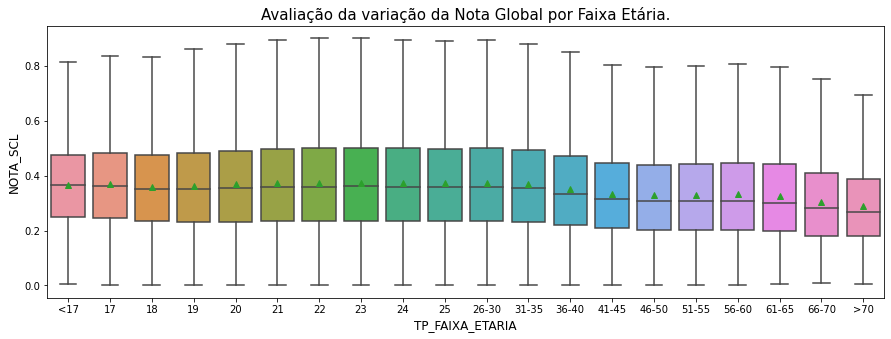

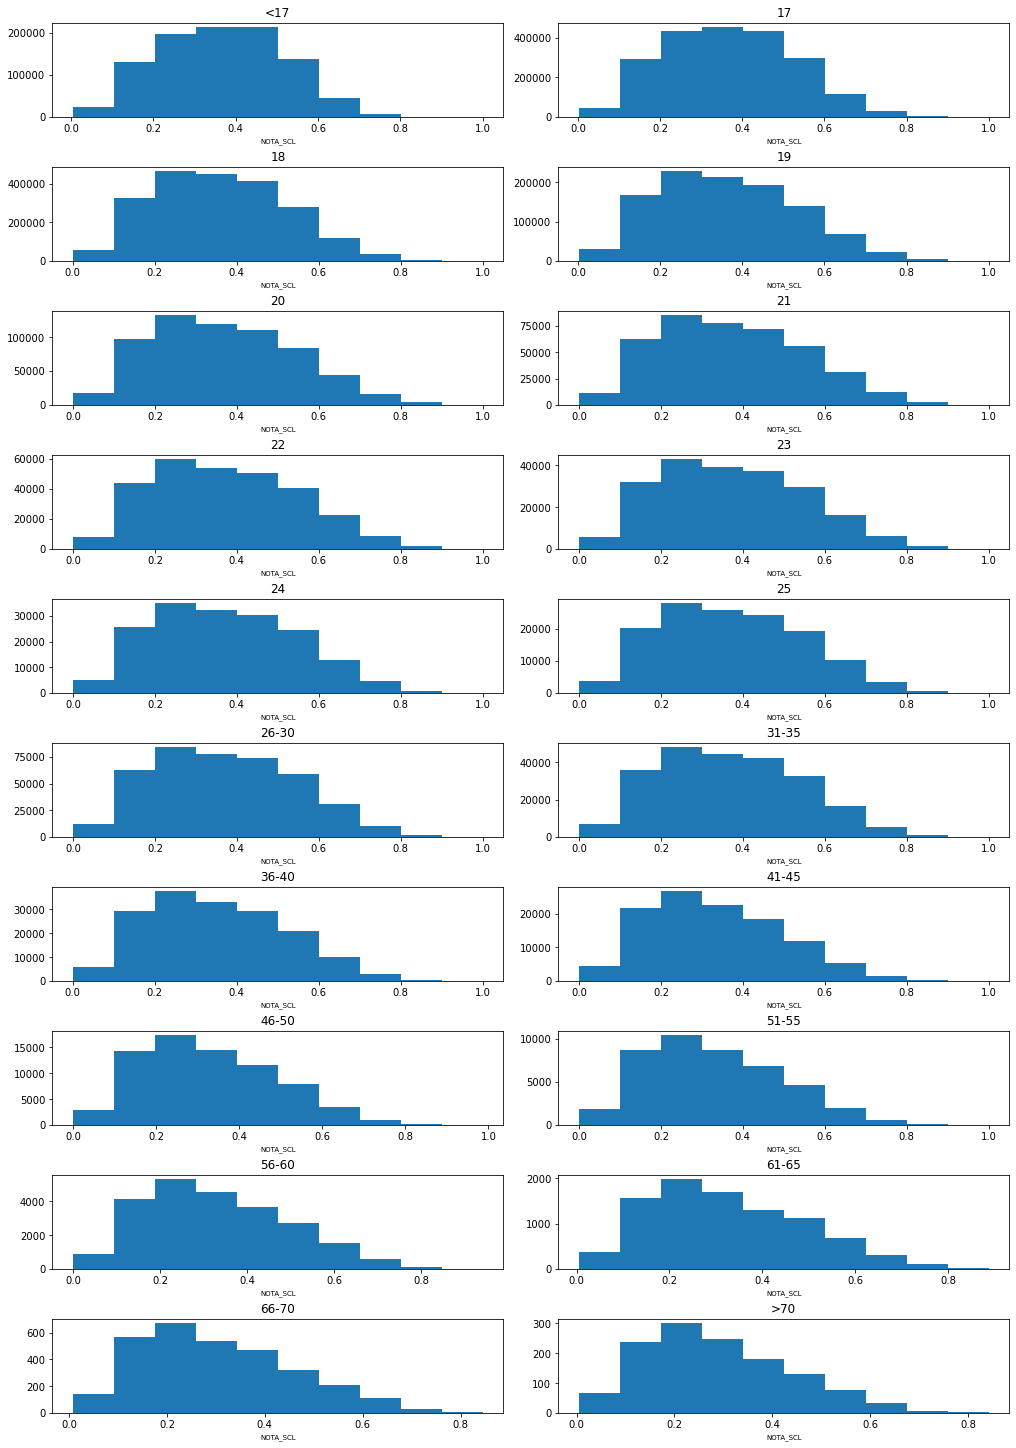




Avaliação da variação da Nota Global por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,5708639.00,3532081.00
count_%,61.78,38.22
mean,0.35,0.39
std,0.16,0.17
min,0.00,0.00
25%,0.23,0.26
50%,0.34,0.39
75%,0.46,0.51
max,1.00,1.00


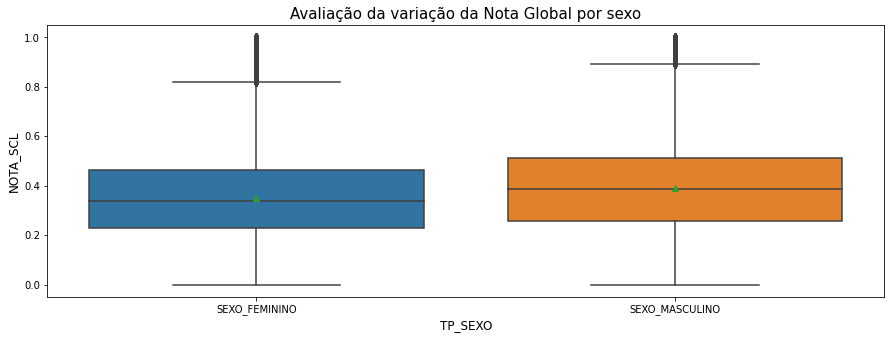

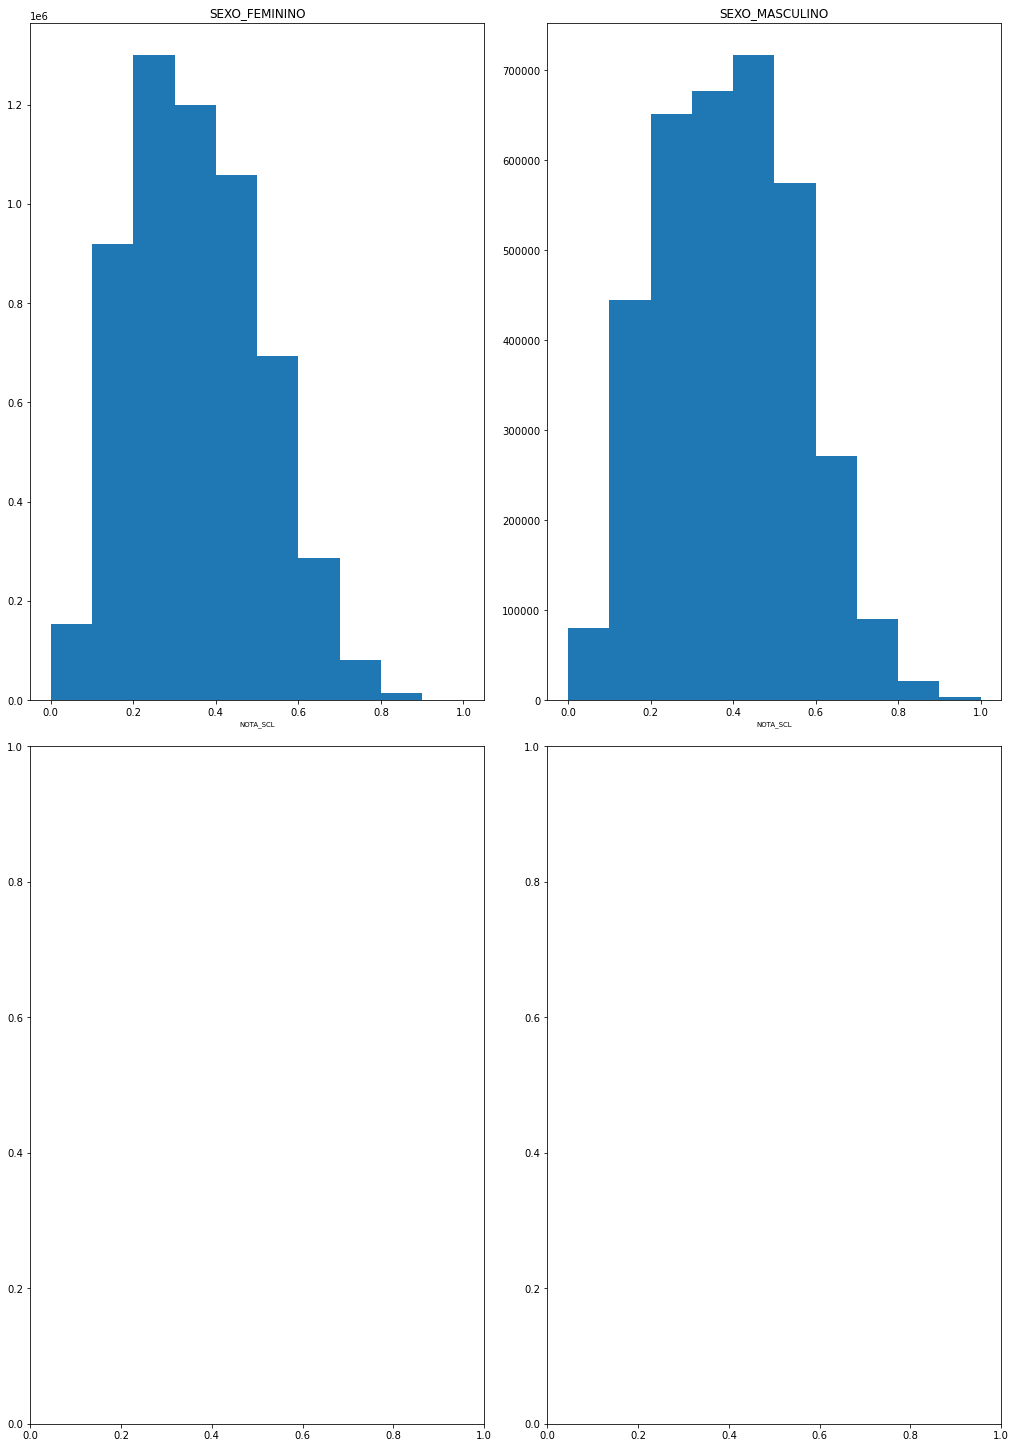




Avaliação da variação da Nota Global por Raça


,Nao declarado,Branca,Preta,Parda,Amarela,Indigena,Nao dispoe da informacao
count,181064.00,4028314.00,1023416.00,3778045.00,185507.00,44366.00,8.00
count_%,1.96,43.59,11.08,40.88,2.01,0.48,0.00
mean,0.37,0.41,0.33,0.33,0.36,0.28,0.31
std,0.17,0.16,0.15,0.15,0.17,0.13,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.11
25%,0.23,0.28,0.21,0.21,0.23,0.18,0.25
50%,0.35,0.41,0.31,0.32,0.35,0.26,0.34
75%,0.49,0.53,0.43,0.44,0.48,0.36,0.36
max,1.00,1.00,1.00,1.00,1.00,0.93,0.47


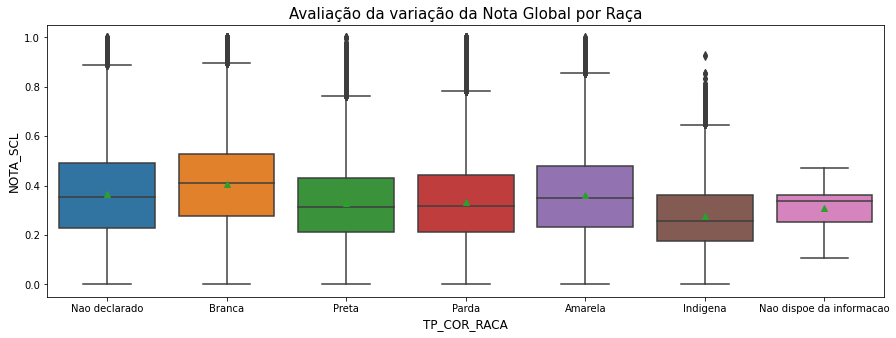

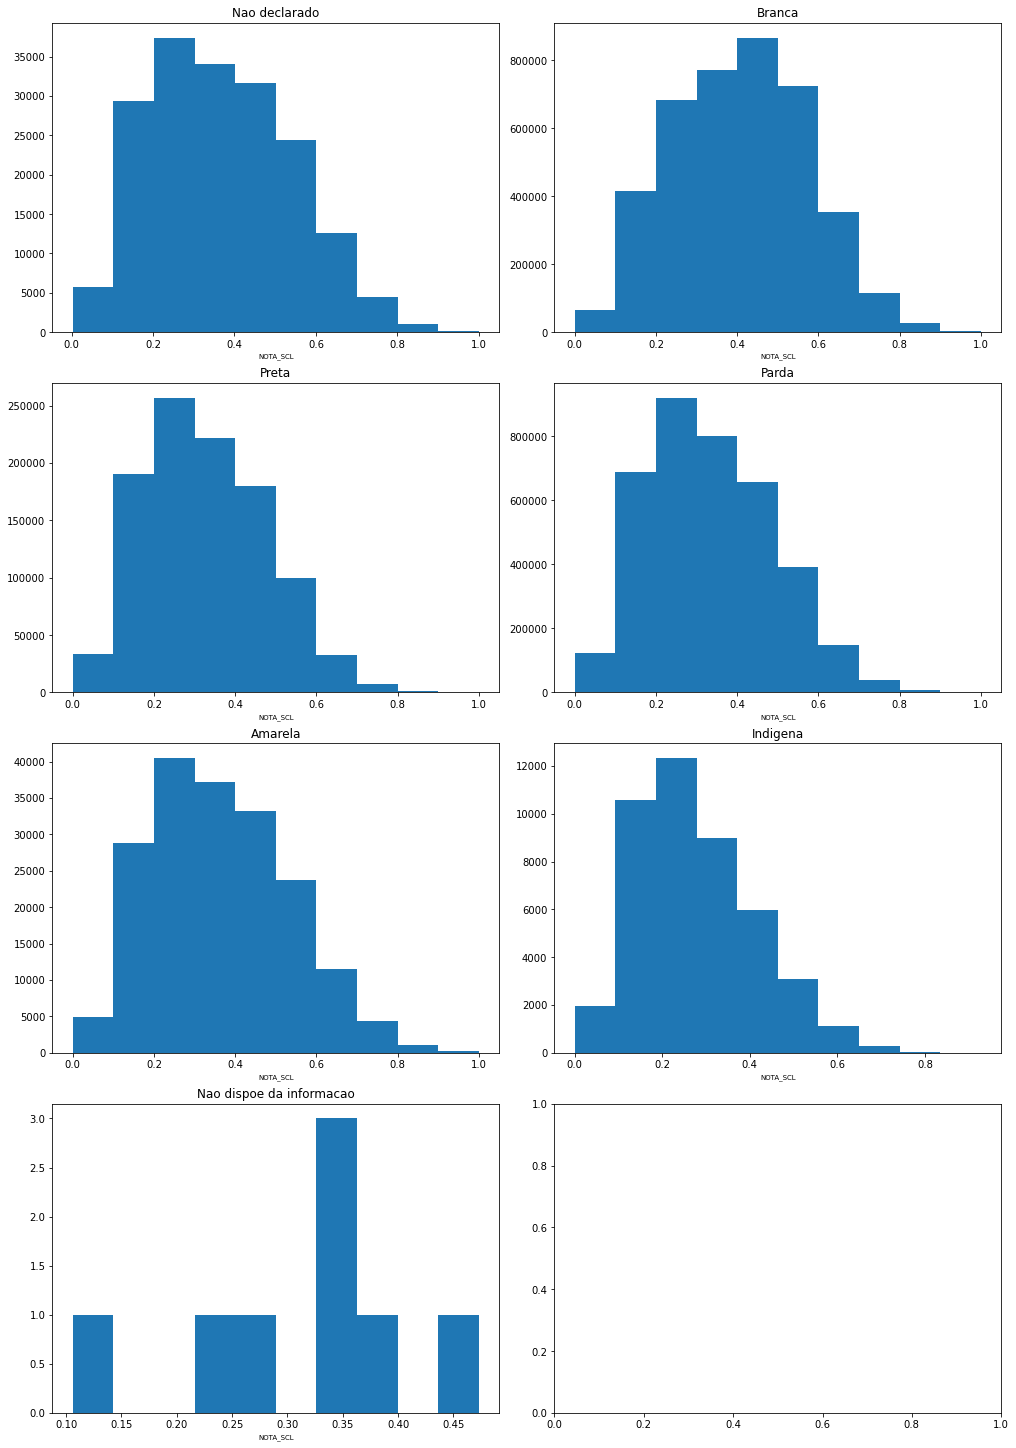




Avaliação da variação da Nota Global por Ano de Conclusão Ensino Médio.


,Nao informado,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,Antes 2007
count,5384324.00,1135621.00,651657.00,412618.00,292411.00,209076.00,161266.00,128555.00,102436.00,87138.00,70458.00,63813.00,57265.00,49209.00,45764.00,389109.00
count_%,58.27,12.29,7.05,4.47,3.16,2.26,1.75,1.39,1.11,0.94,0.76,0.69,0.62,0.53,0.50,4.21
mean,0.35,0.38,0.38,0.39,0.39,0.40,0.39,0.39,0.39,0.39,0.40,0.39,0.39,0.39,0.38,0.38
std,0.15,0.16,0.17,0.17,0.18,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.23,0.25,0.25,0.25,0.25,0.26,0.25,0.26,0.26,0.26,0.26,0.25,0.25,0.25,0.25,0.24
50%,0.34,0.38,0.38,0.38,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.38,0.38,0.39,0.38,0.37
75%,0.46,0.50,0.51,0.51,0.52,0.53,0.52,0.52,0.52,0.52,0.53,0.52,0.52,0.52,0.51,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.97,1.00,1.00,1.00,1.00


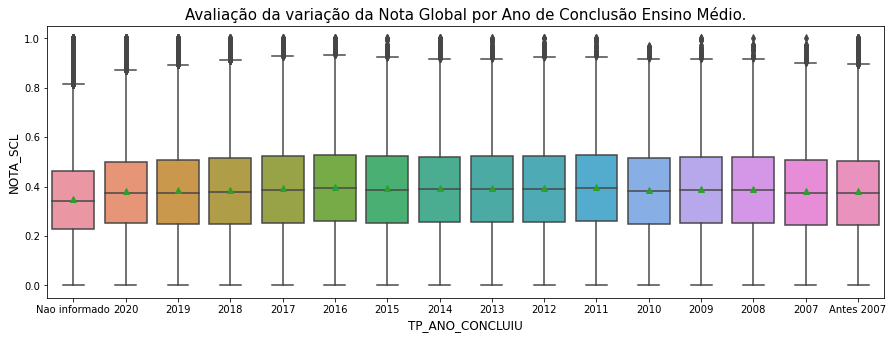

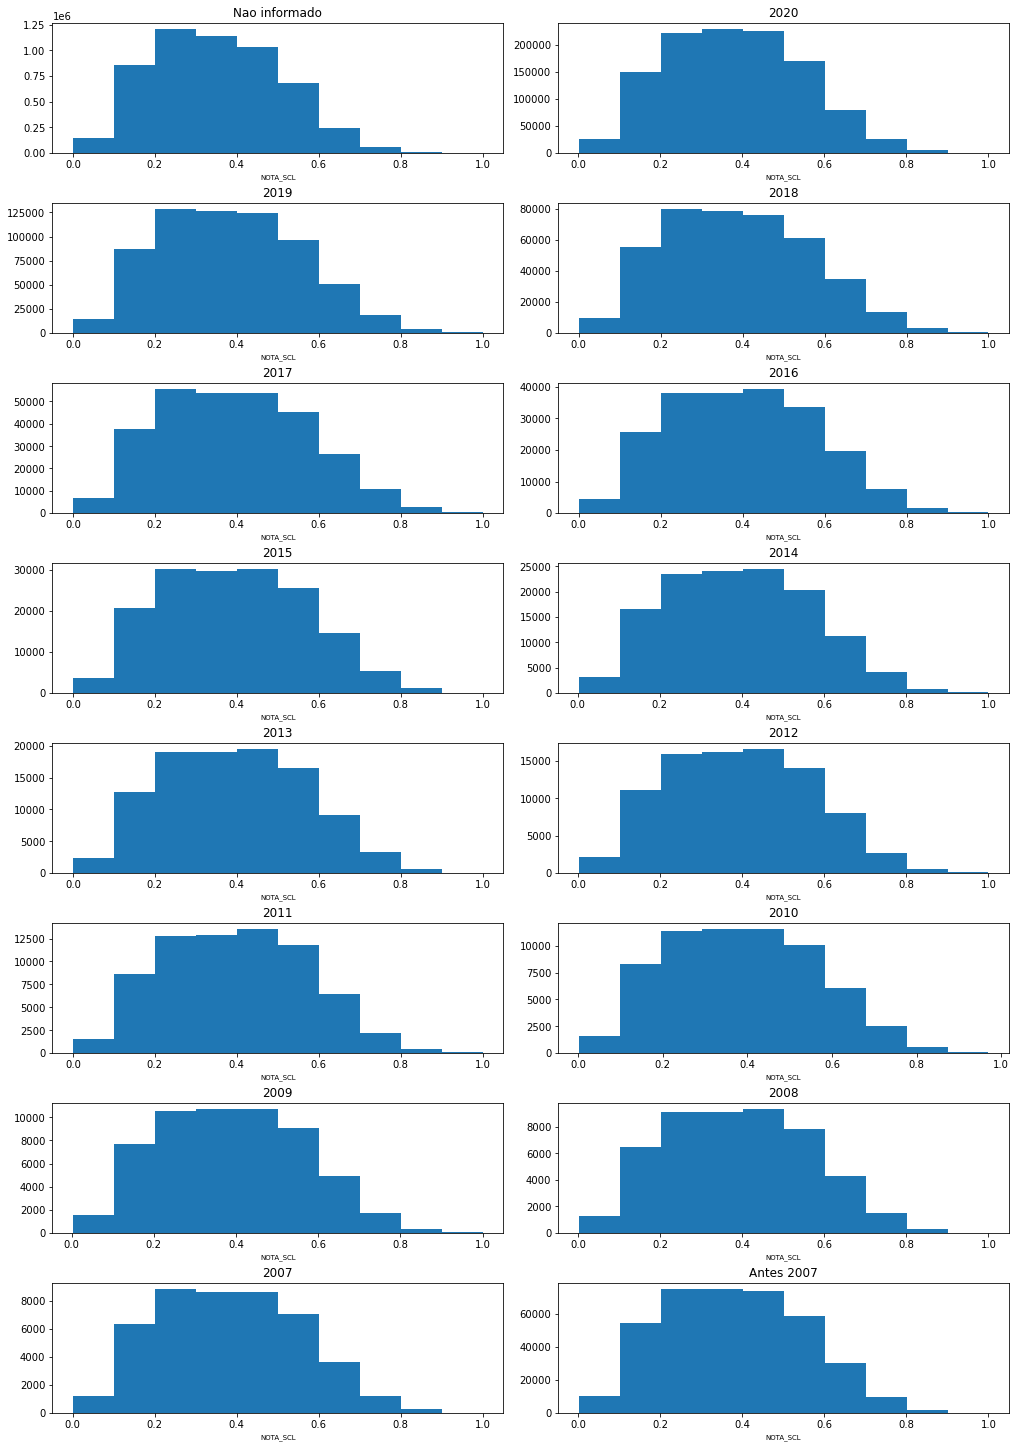




Avaliação da variação da Nota Global por Escola Pública/Privada.


,Nao Respondeu,Publica,Privada
count,5758286.00,2757672.00,724762.00
count_%,62.31,29.84,7.84
mean,0.37,0.33,0.46
std,0.16,0.14,0.16
min,0.00,0.00,0.00
25%,0.24,0.21,0.34
50%,0.37,0.31,0.47
75%,0.49,0.43,0.57
max,1.00,1.00,1.00


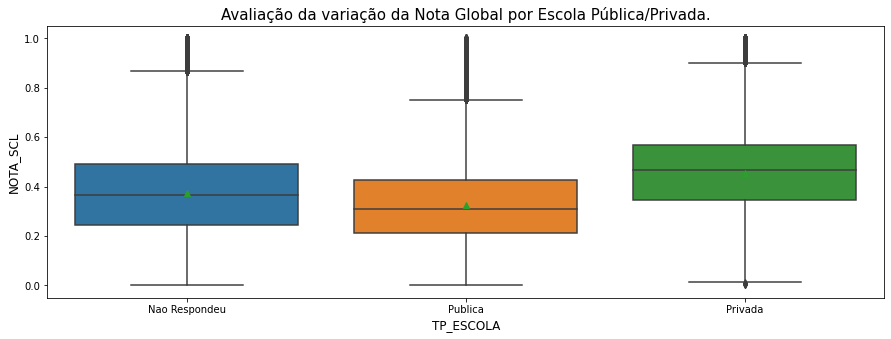

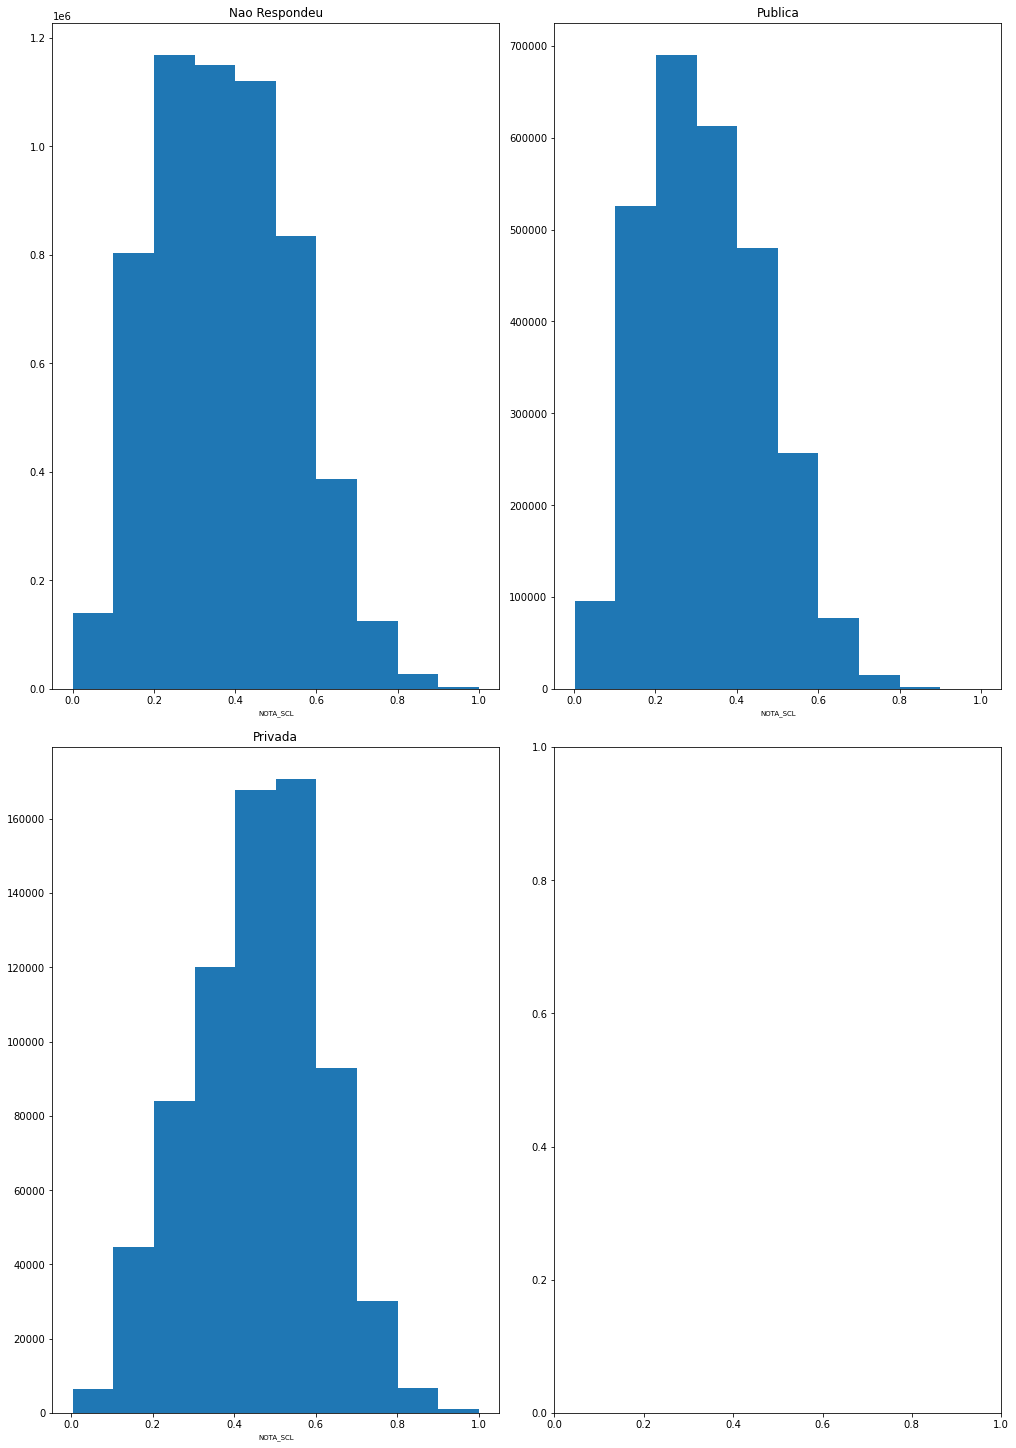




Avaliação da variação da Nota Global por região da aplicação da prova.


,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,52970.00,159061.00,189128.00,54364.00,719943.00,589699.00,185799.00,174288.00,347370.00,350105.00,902817.00,111818.00,145730.00,493908.00,289943.00,540352.00,231434.00,396732.00,653328.00,231452.00,78696.00,20259.00,417374.00,225311.00,153456.00,1443360.00,82023.00
count_%,0.57,1.72,2.05,0.59,7.79,6.38,2.01,1.89,3.76,3.79,9.77,1.21,1.58,5.34,3.14,5.85,2.50,4.29,7.07,2.50,0.85,0.22,4.52,2.44,1.66,15.62,0.89
mean,0.32,0.33,0.30,0.31,0.34,0.34,0.40,0.39,0.36,0.31,0.40,0.36,0.35,0.32,0.34,0.35,0.33,0.39,0.39,0.36,0.33,0.34,0.39,0.40,0.34,0.41,0.32
std,0.14,0.16,0.14,0.15,0.16,0.16,0.17,0.16,0.16,0.15,0.16,0.16,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.16,0.15,0.15,0.16,0.16,0.16,0.16,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
25%,0.21,0.21,0.19,0.20,0.22,0.21,0.26,0.26,0.23,0.20,0.27,0.23,0.22,0.20,0.21,0.22,0.20,0.27,0.26,0.23,0.21,0.22,0.27,0.28,0.21,0.29,0.20
50%,0.31,0.32,0.28,0.29,0.32,0.32,0.40,0.38,0.34,0.29,0.40,0.34,0.33,0.30,0.32,0.33,0.30,0.39,0.39,0.35,0.31,0.33,0.39,0.40,0.32,0.42,0.30
75%,0.42,0.44,0.40,0.42,0.45,0.45,0.52,0.50,0.47,0.41,0.52,0.47,0.46,0.42,0.45,0.46,0.43,0.50,0.51,0.48,0.43,0.45,0.50,0.51,0.45,0.53,0.43
max,0.88,0.99,1.00,0.93,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.97,0.90,1.00,1.00,1.00,1.00,0.99


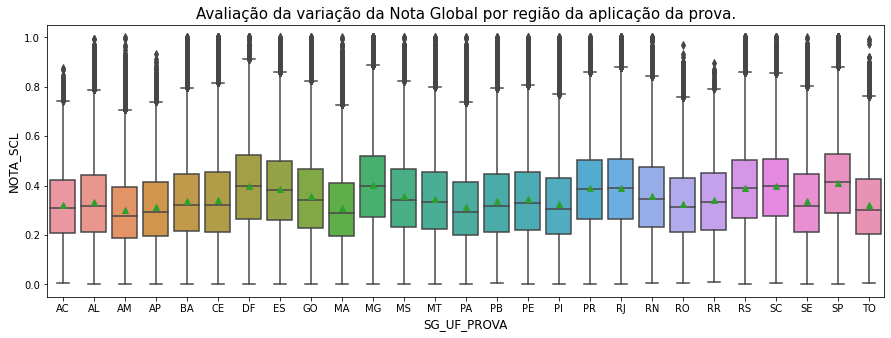

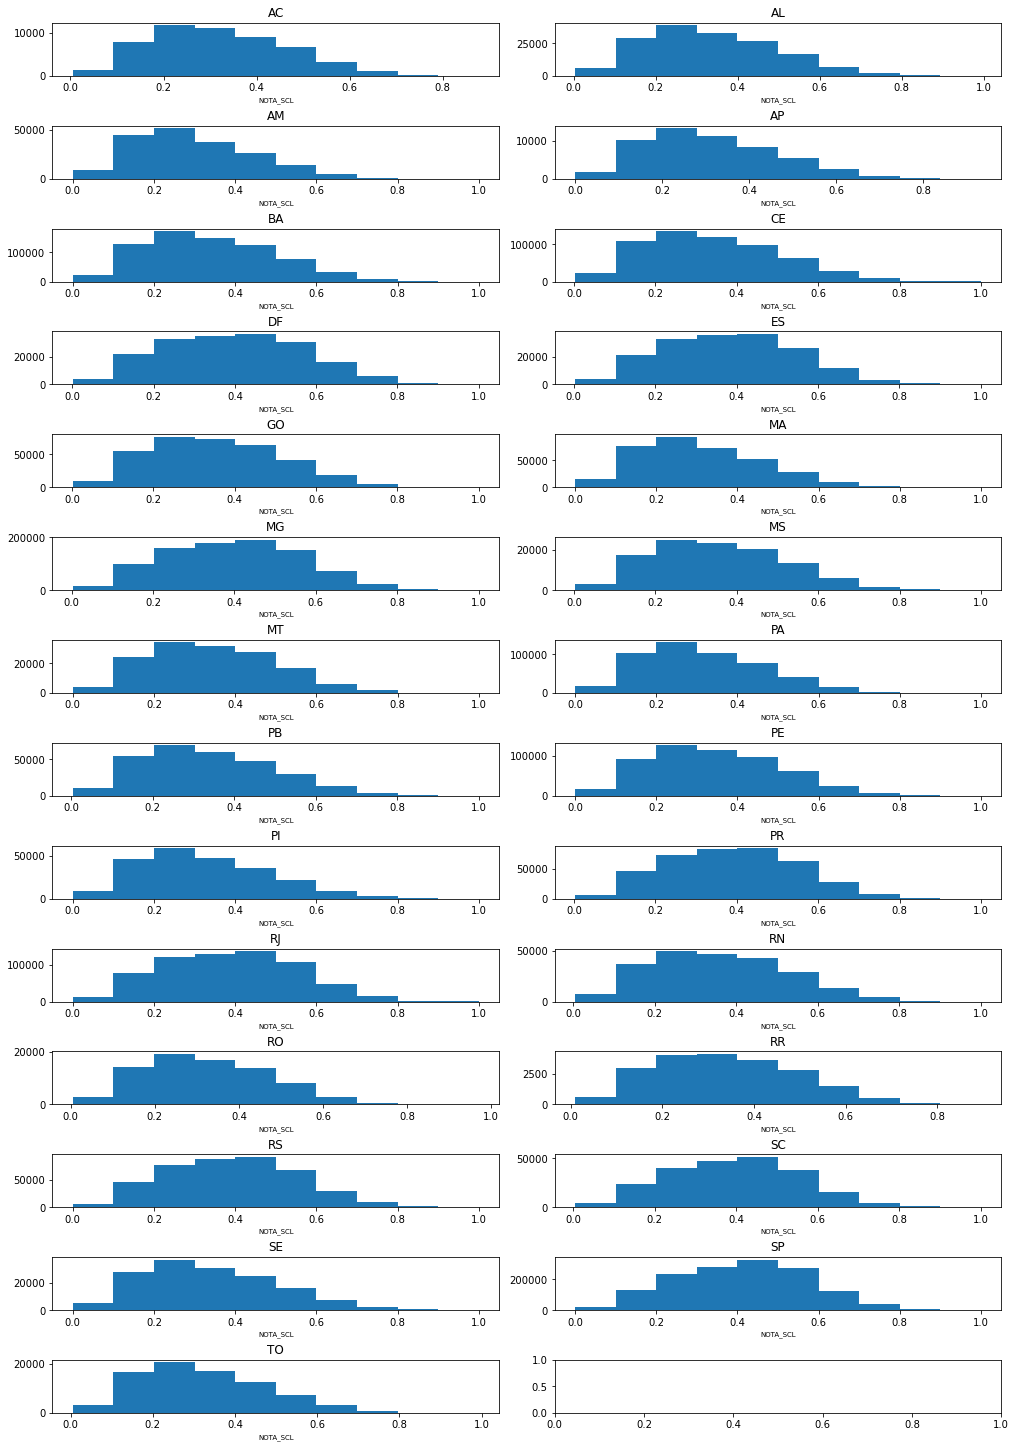




Avaliação da variação da Nota Global por Nível de Estudo do Responsável Homem.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,318633.00,1456176.00,1166005.00,1015713.00,2804673.00,1008058.00,750189.00,721269.00
count_%,3.45,15.76,12.62,10.99,30.35,10.91,8.12,7.81
mean,0.28,0.31,0.33,0.35,0.38,0.45,0.47,0.33
std,0.13,0.14,0.15,0.15,0.16,0.16,0.17,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.20,0.22,0.23,0.25,0.33,0.35,0.21
50%,0.26,0.30,0.32,0.34,0.37,0.46,0.48,0.31
75%,0.37,0.41,0.44,0.46,0.49,0.56,0.58,0.43
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


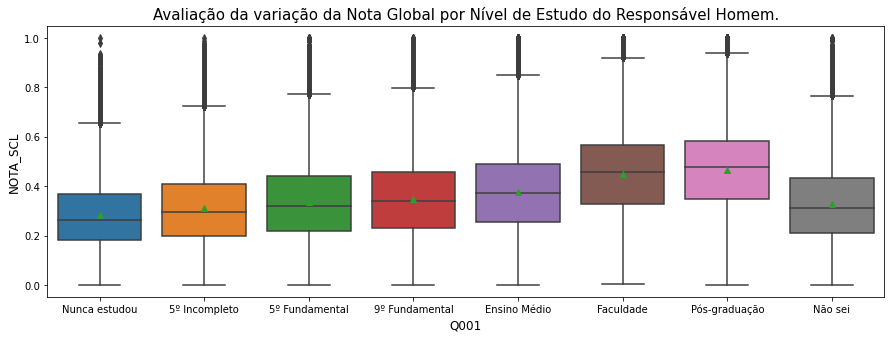

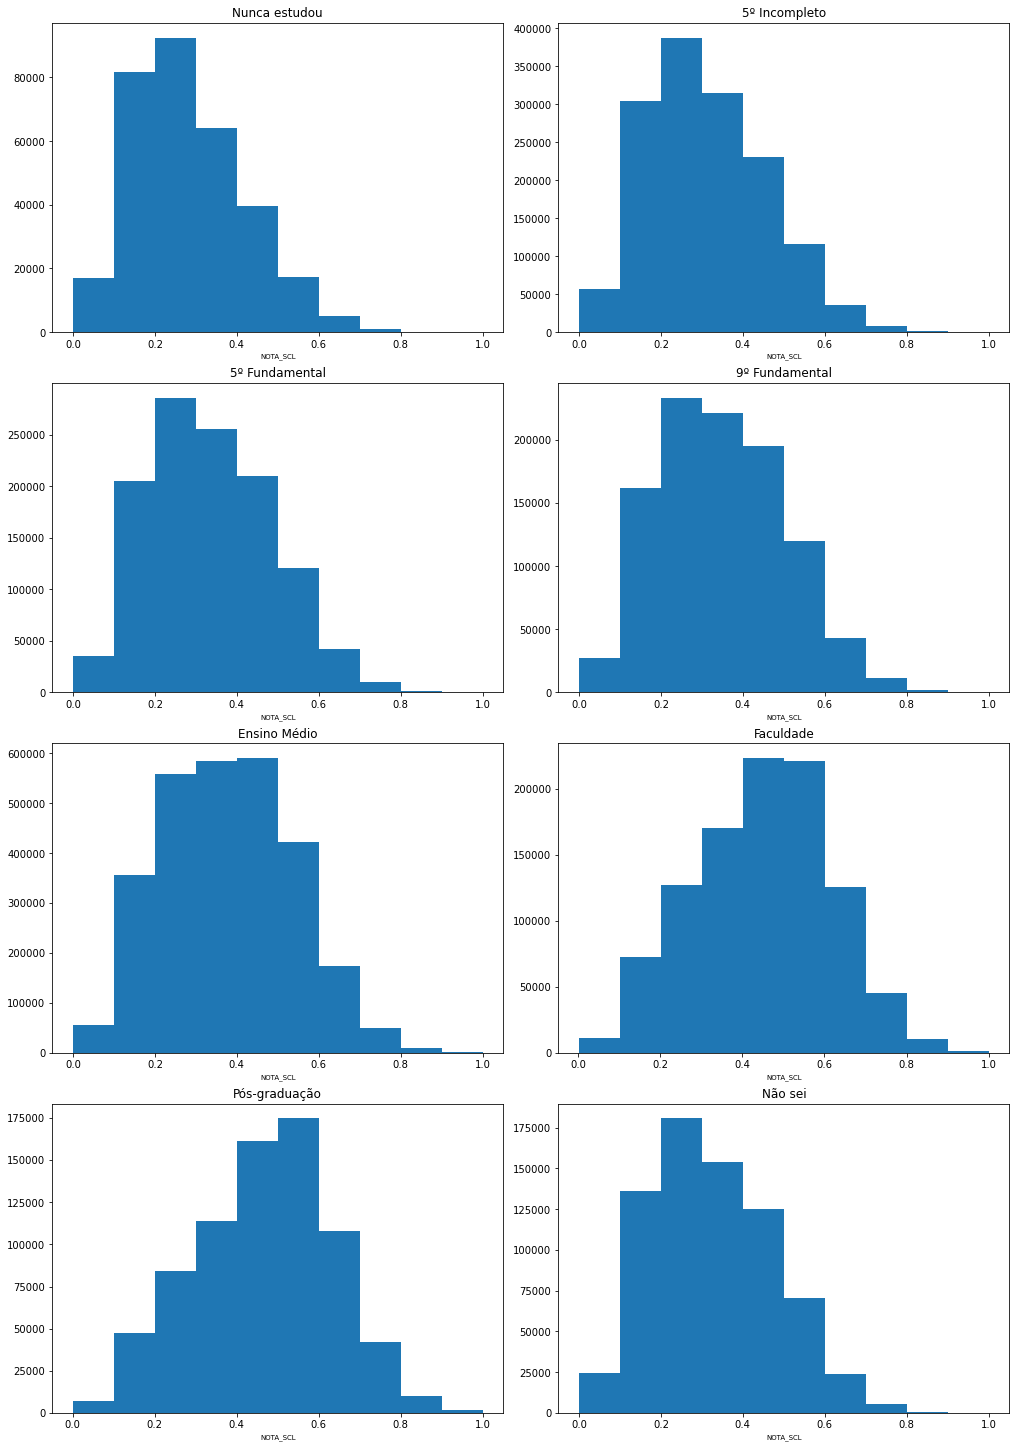




Avaliação da variação da Nota Global por Nível de Estudo do Responsável Mulher.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,201304.00,1015566.00,940262.00,1019243.00,3278099.00,1315530.00,1266012.00,204700.00
count_%,2.18,10.99,10.18,11.03,35.47,14.24,13.70,2.22
mean,0.28,0.30,0.32,0.33,0.36,0.43,0.44,0.30
std,0.13,0.14,0.15,0.15,0.16,0.17,0.17,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.20,0.21,0.22,0.24,0.30,0.31,0.19
50%,0.26,0.29,0.31,0.32,0.36,0.43,0.45,0.28
75%,0.36,0.40,0.42,0.44,0.48,0.55,0.56,0.40
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


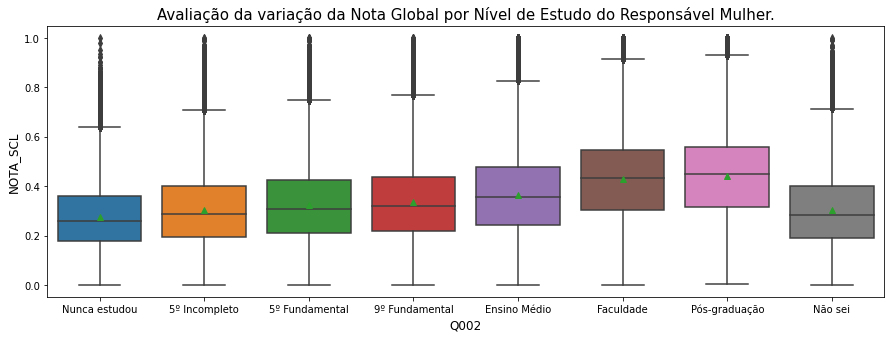

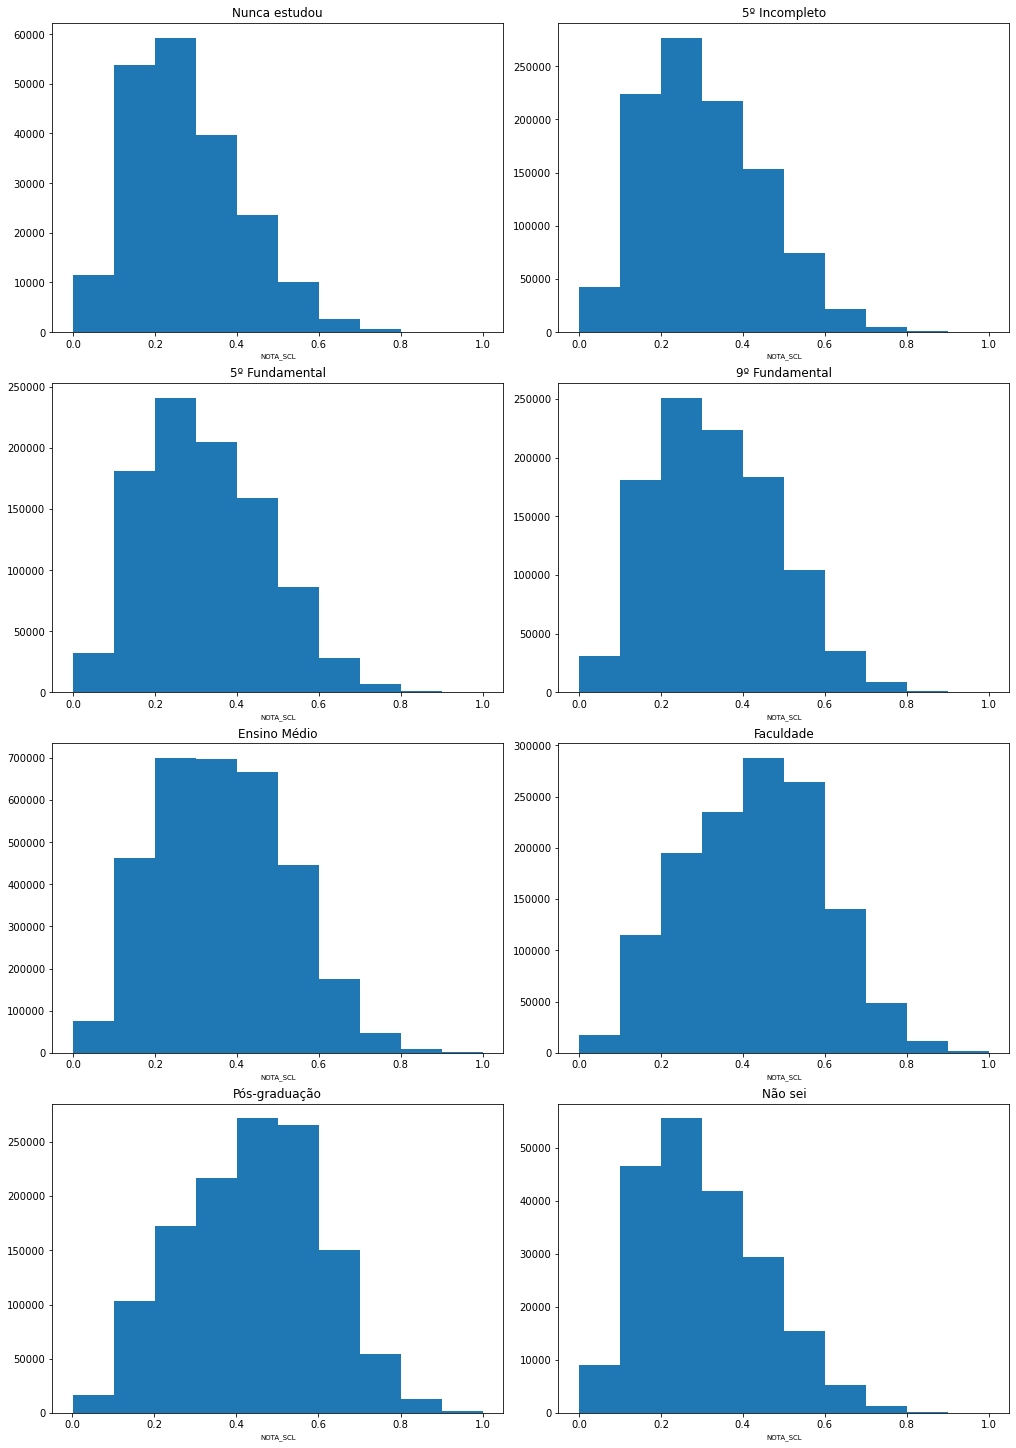




Avaliação da variação da Nota Global por Qtd de Residentes.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,201240.00,1114323.00,2527299.00,3276286.00,1411942.00,446559.00,153366.00,61915.00,23098.00,13416.00,4572.00,2952.00,1249.00,752.00,517.00,260.00,127.00,134.00,90.00,619.00
count_%,2.18,12.06,27.35,35.45,15.28,4.83,1.66,0.67,0.25,0.15,0.05,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01
mean,0.39,0.37,0.37,0.37,0.35,0.33,0.31,0.30,0.29,0.28,0.29,0.28,0.28,0.30,0.28,0.30,0.27,0.32,0.29,0.32
std,0.17,0.16,0.16,0.16,0.16,0.15,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.15,0.14,0.15,0.14,0.17,0.16,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.03,0.05,0.03,0.02,0.05,0.00
25%,0.25,0.24,0.24,0.24,0.23,0.21,0.20,0.19,0.18,0.18,0.18,0.18,0.18,0.18,0.17,0.19,0.16,0.18,0.18,0.17
50%,0.38,0.36,0.37,0.37,0.34,0.31,0.29,0.28,0.27,0.26,0.26,0.26,0.26,0.27,0.25,0.28,0.26,0.29,0.25,0.27
75%,0.51,0.49,0.49,0.49,0.47,0.44,0.41,0.40,0.38,0.37,0.38,0.36,0.36,0.39,0.36,0.40,0.37,0.44,0.37,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.94,1.00,0.94,0.83,0.92,0.87,0.88,0.80,0.68,0.73,0.78,0.87


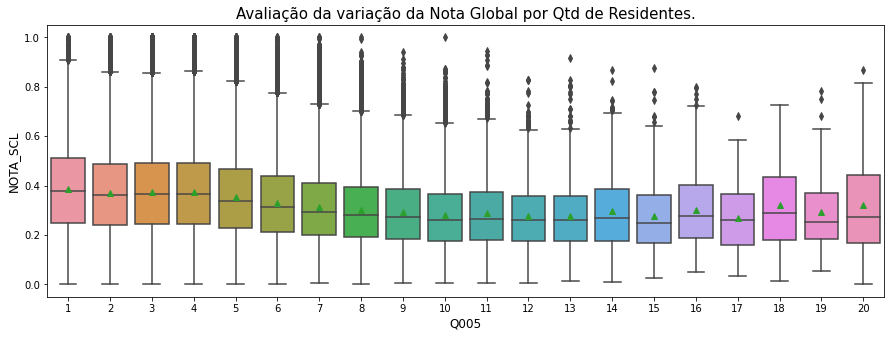

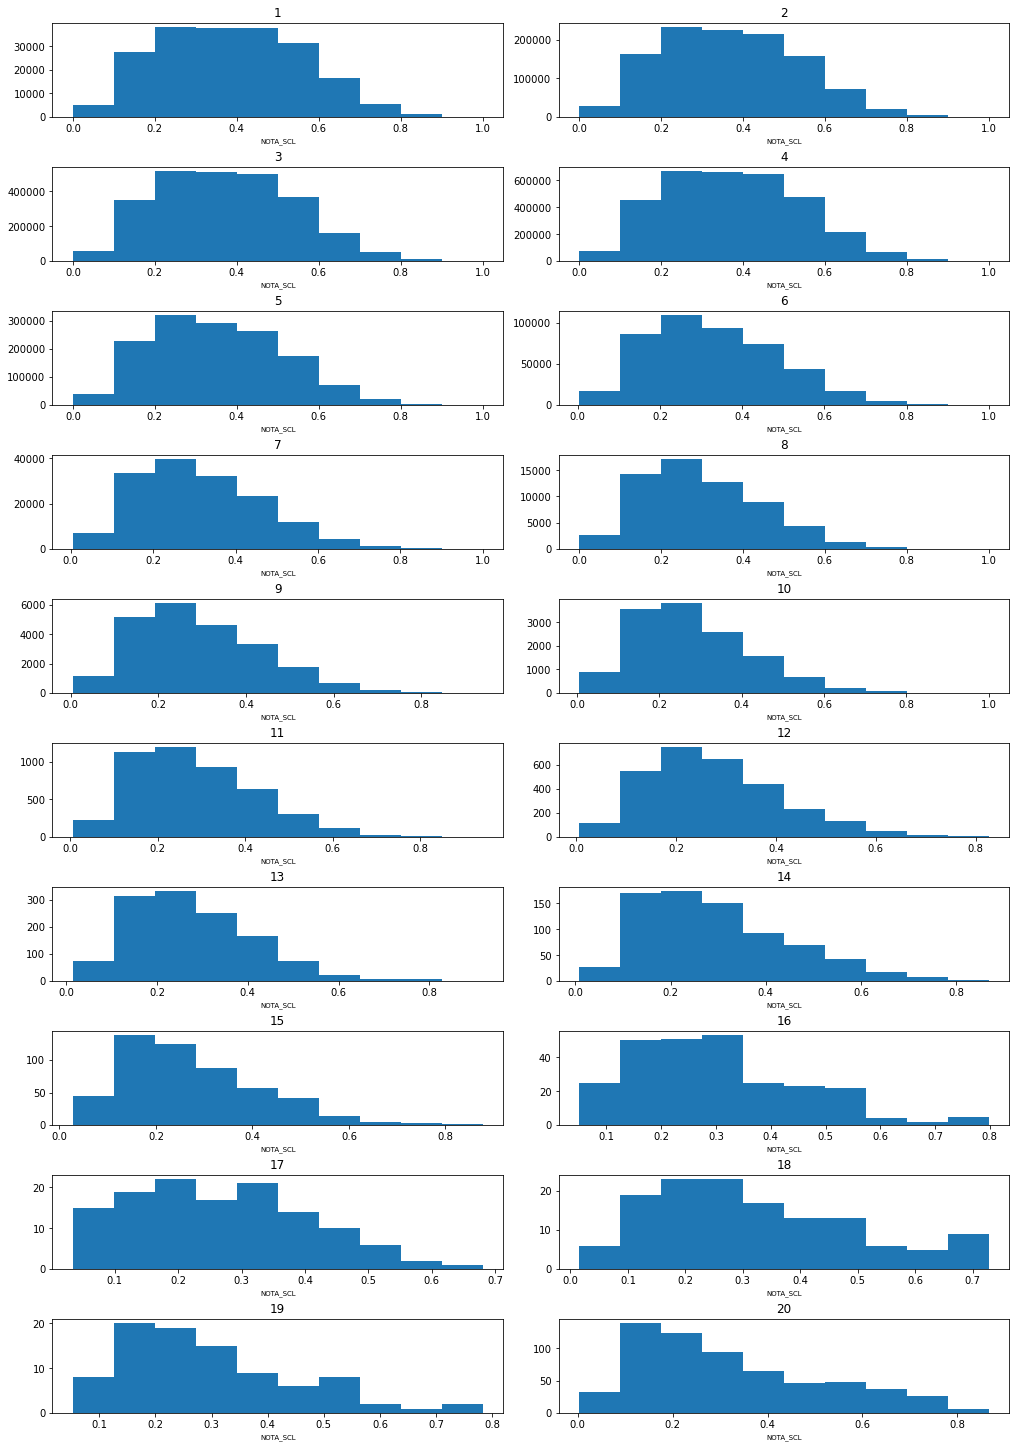




Avaliação da variação da Nota Global pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,470894.00,2273976.00,1438971.00,1148044.00,592850.00,690188.00,604747.00,485692.00,308278.00,191698.00,151640.00,133008.00,195533.00,122601.00,134240.00,134146.00,164210.00
count_%,5.10,24.61,15.57,12.42,6.42,7.47,6.54,5.26,3.34,2.07,1.64,1.44,2.12,1.33,1.45,1.45,1.78
mean,0.27,0.30,0.34,0.36,0.38,0.39,0.41,0.43,0.44,0.46,0.46,0.47,0.48,0.49,0.50,0.51,0.52
std,0.13,0.14,0.14,0.15,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01
25%,0.18,0.19,0.22,0.24,0.26,0.27,0.30,0.31,0.33,0.34,0.35,0.36,0.37,0.39,0.40,0.41,0.42
50%,0.25,0.28,0.32,0.35,0.38,0.39,0.42,0.44,0.45,0.47,0.48,0.48,0.49,0.50,0.51,0.52,0.53
75%,0.36,0.39,0.44,0.46,0.49,0.50,0.53,0.54,0.56,0.57,0.58,0.58,0.59,0.60,0.61,0.62,0.63
max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


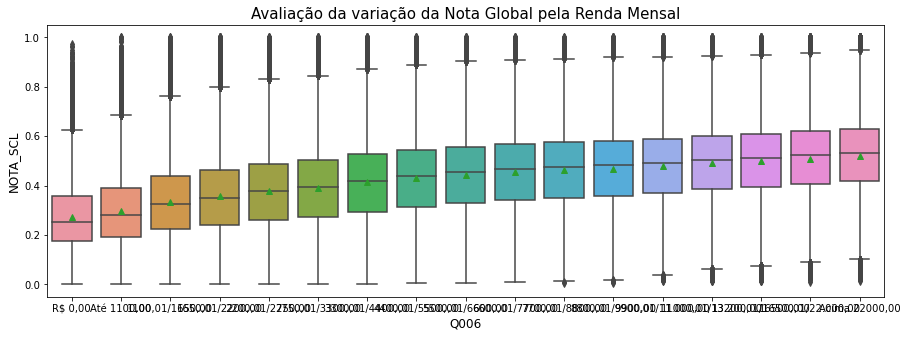

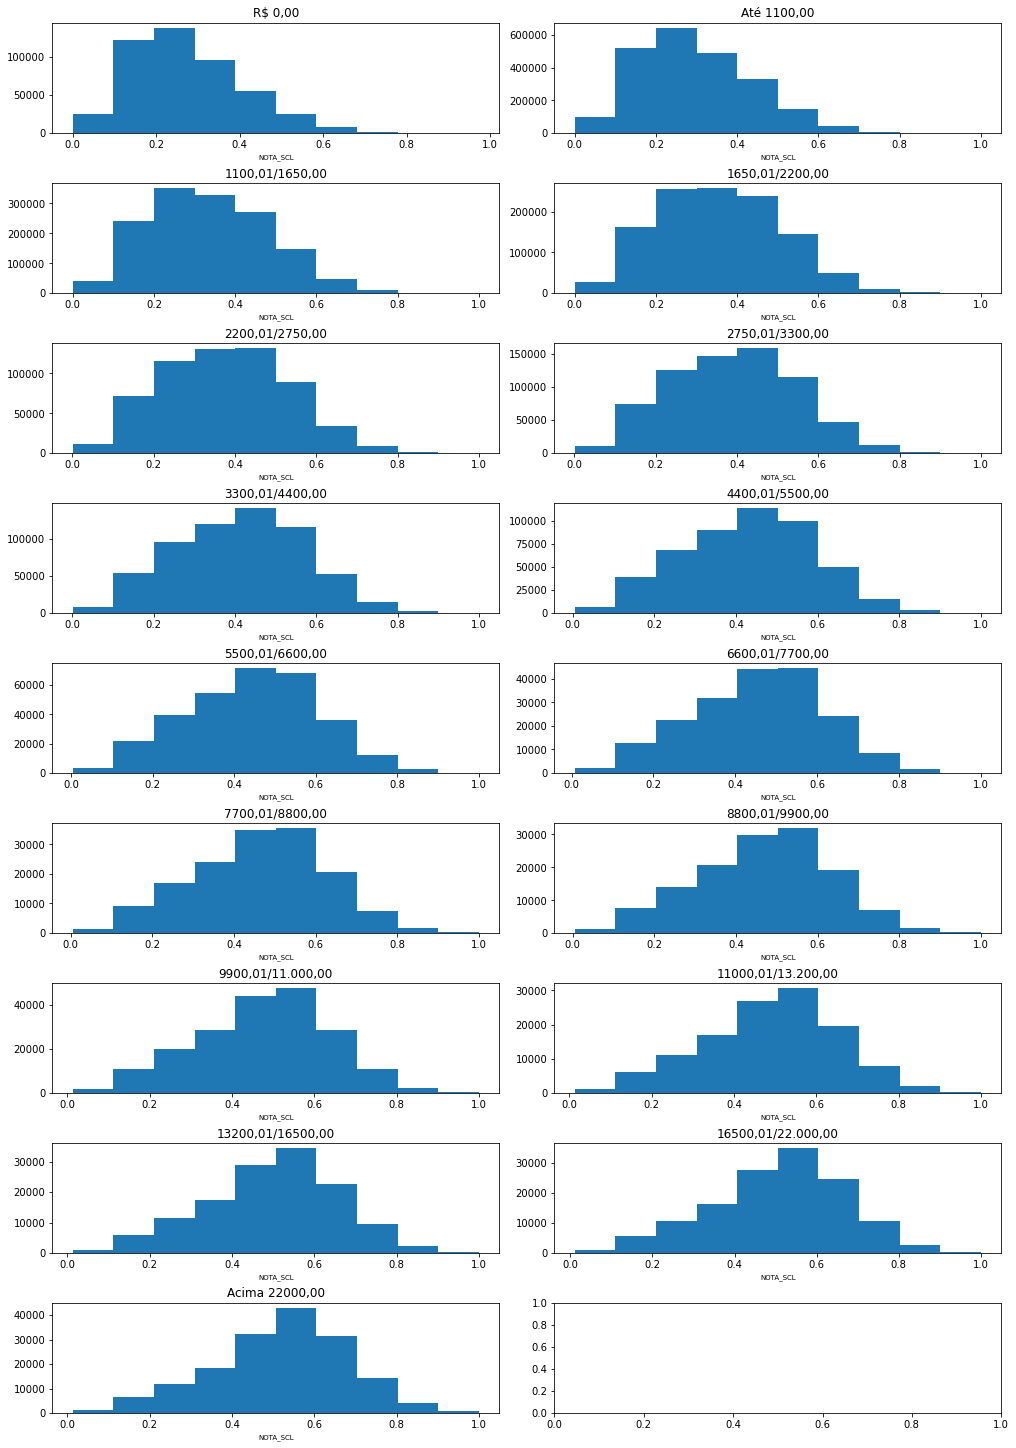




Avaliação da variação da Nota Global pela Qtd de Celulares na Residência


,0,1,2,3,4+
count,155960.00,1331974.00,2435139.00,2941813.00,2375830.00
count_%,1.69,14.41,26.35,31.84,25.71
mean,0.30,0.30,0.35,0.38,0.41
std,0.15,0.15,0.15,0.16,0.17
min,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.19,0.22,0.25,0.28
50%,0.28,0.28,0.33,0.37,0.41
75%,0.40,0.40,0.46,0.49,0.53
max,0.99,1.00,1.00,1.00,1.00


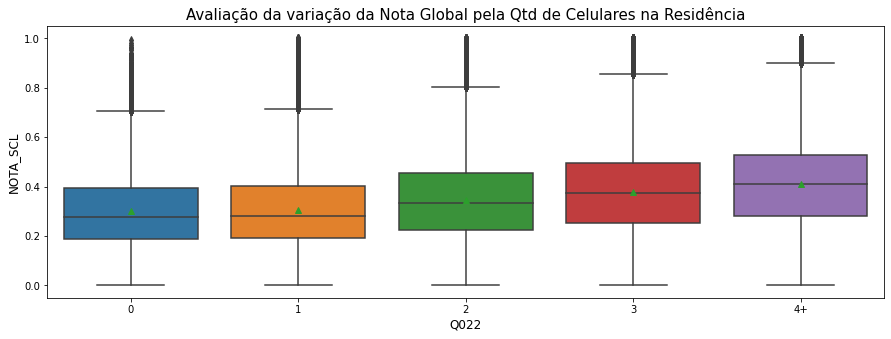

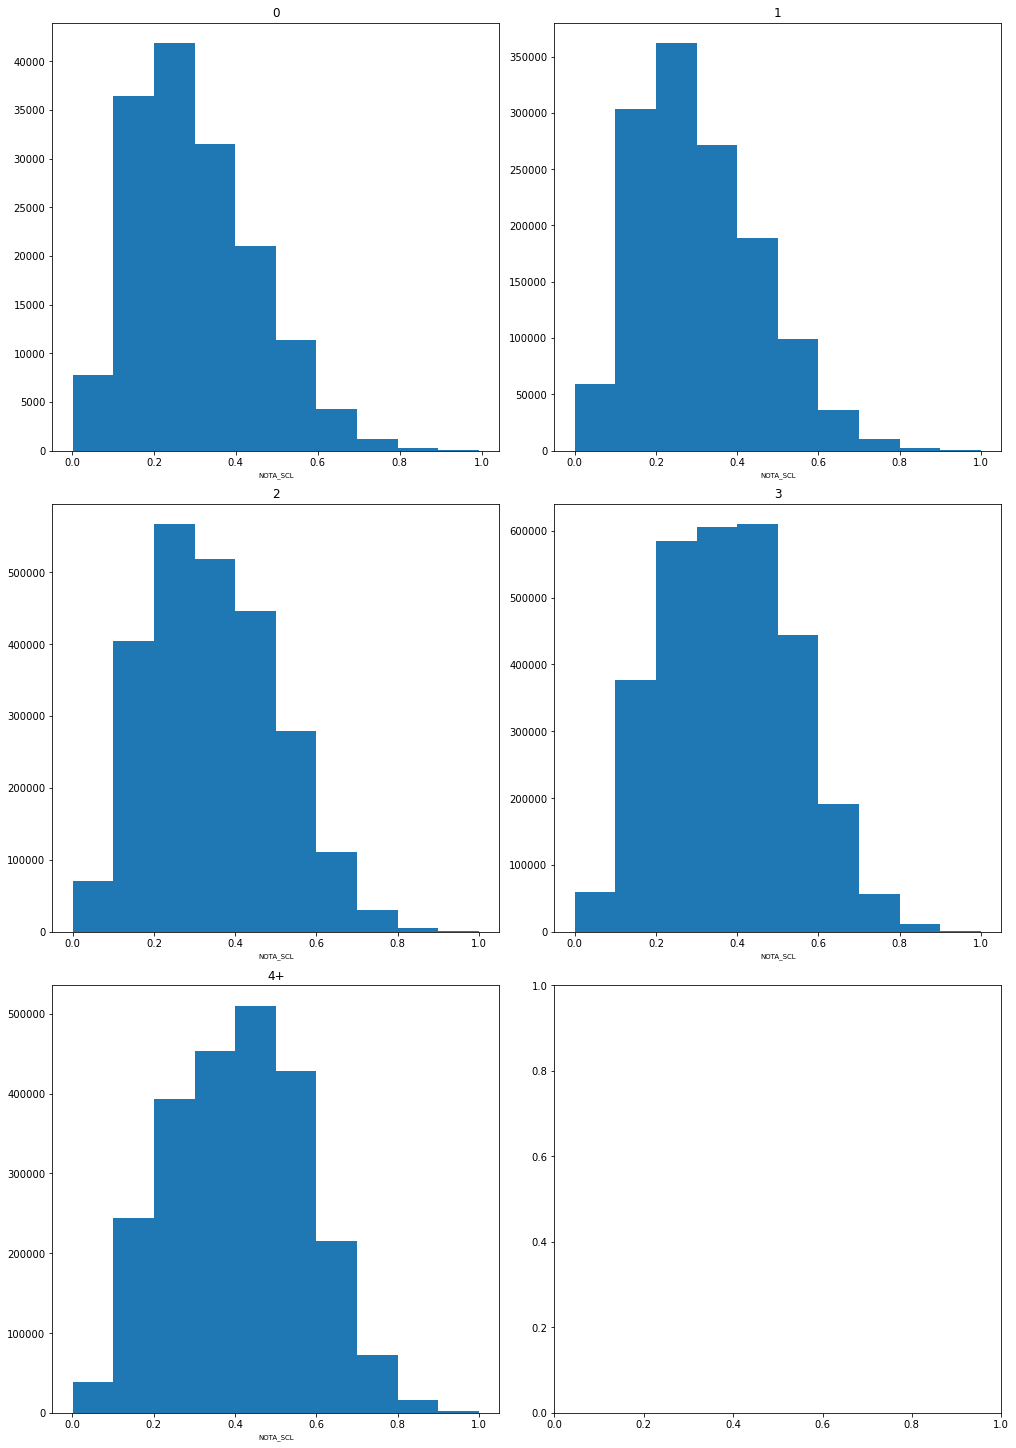




Avaliação da variação da Nota Global pela Qtd de Computadores na Residência


,0,1,2,3,4+
count,3470278.00,3926638.00,1142555.00,461763.00,239482.00
count_%,37.55,42.49,12.36,5.00,2.59
mean,0.30,0.38,0.45,0.48,0.51
std,0.13,0.16,0.16,0.16,0.16
min,0.00,0.00,0.00,0.00,0.01
25%,0.19,0.26,0.33,0.38,0.41
50%,0.28,0.38,0.46,0.50,0.52
75%,0.39,0.49,0.56,0.60,0.62
max,1.00,1.00,1.00,1.00,1.00


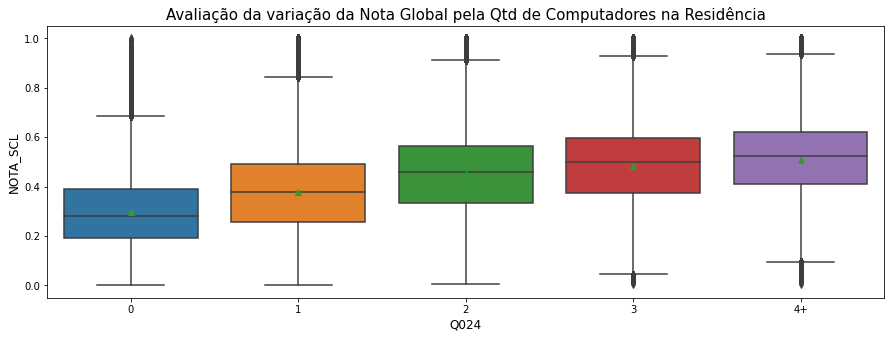

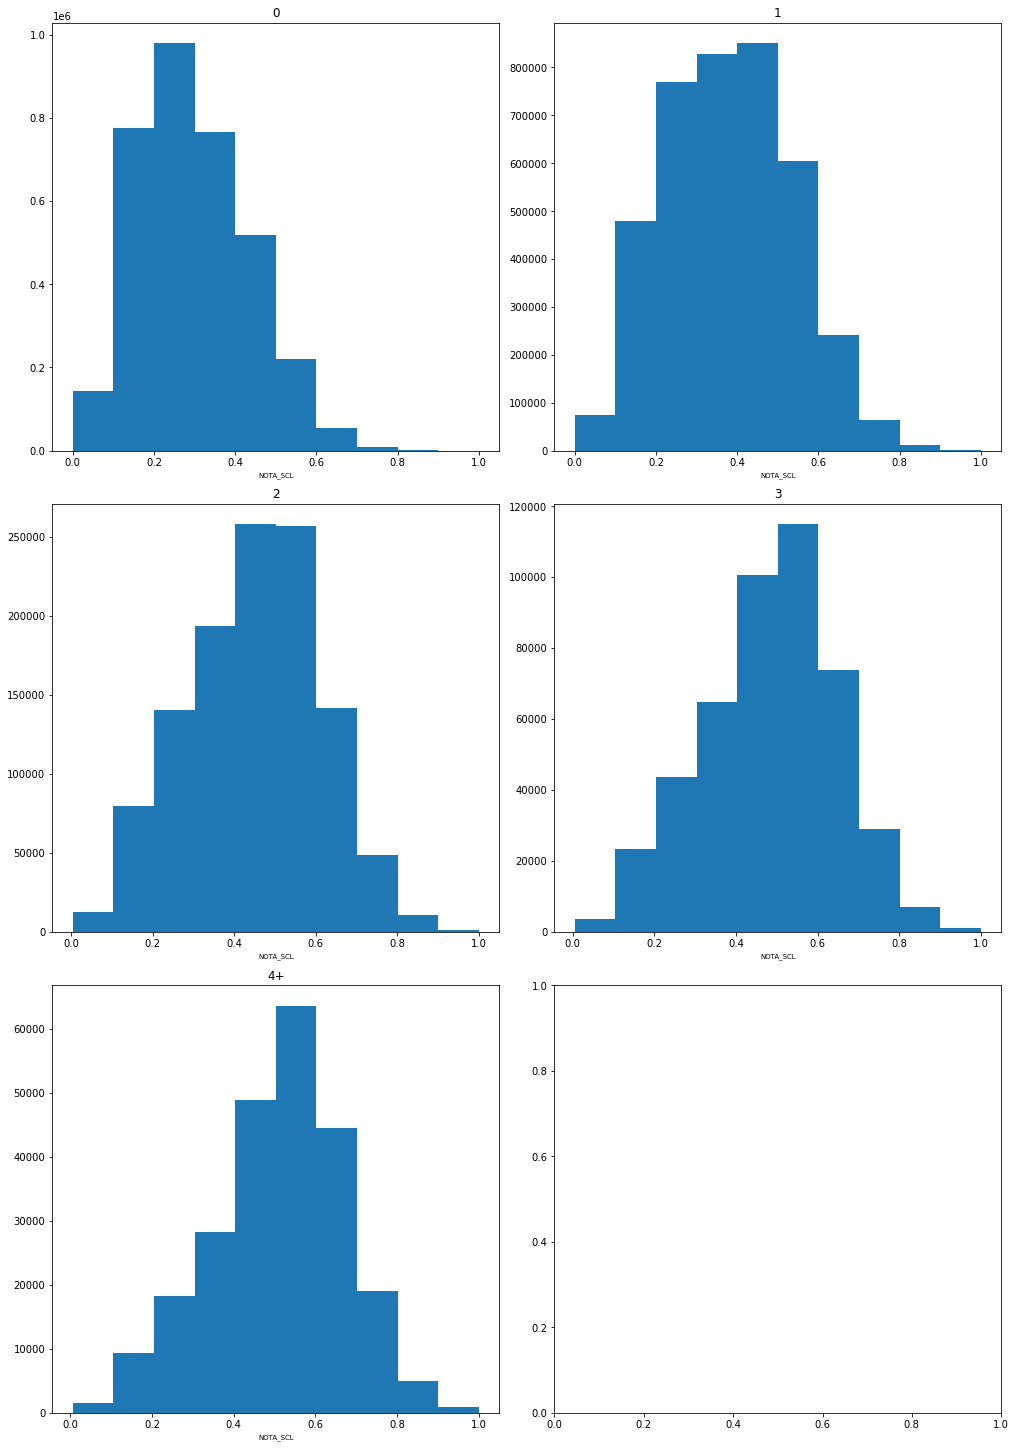




Avaliação da variação da Nota Global por Acesso a Internet na Residência


,NAO,SIM
count,790549.00,8450167.00
count_%,8.56,91.44
mean,0.28,0.37
std,0.13,0.16
min,0.00,0.00
25%,0.18,0.25
50%,0.26,0.37
75%,0.36,0.49
max,1.00,1.00


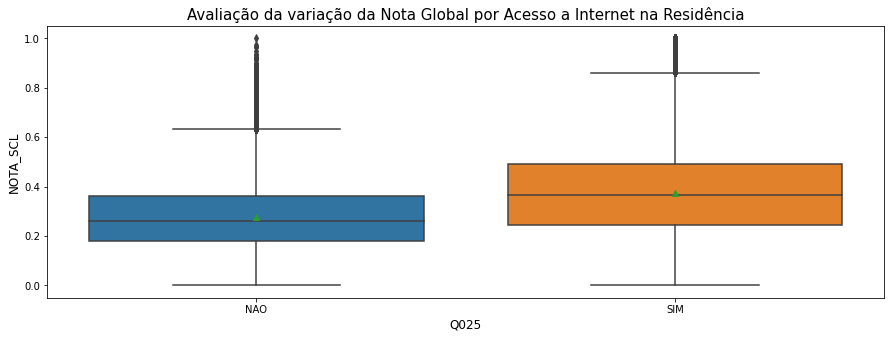

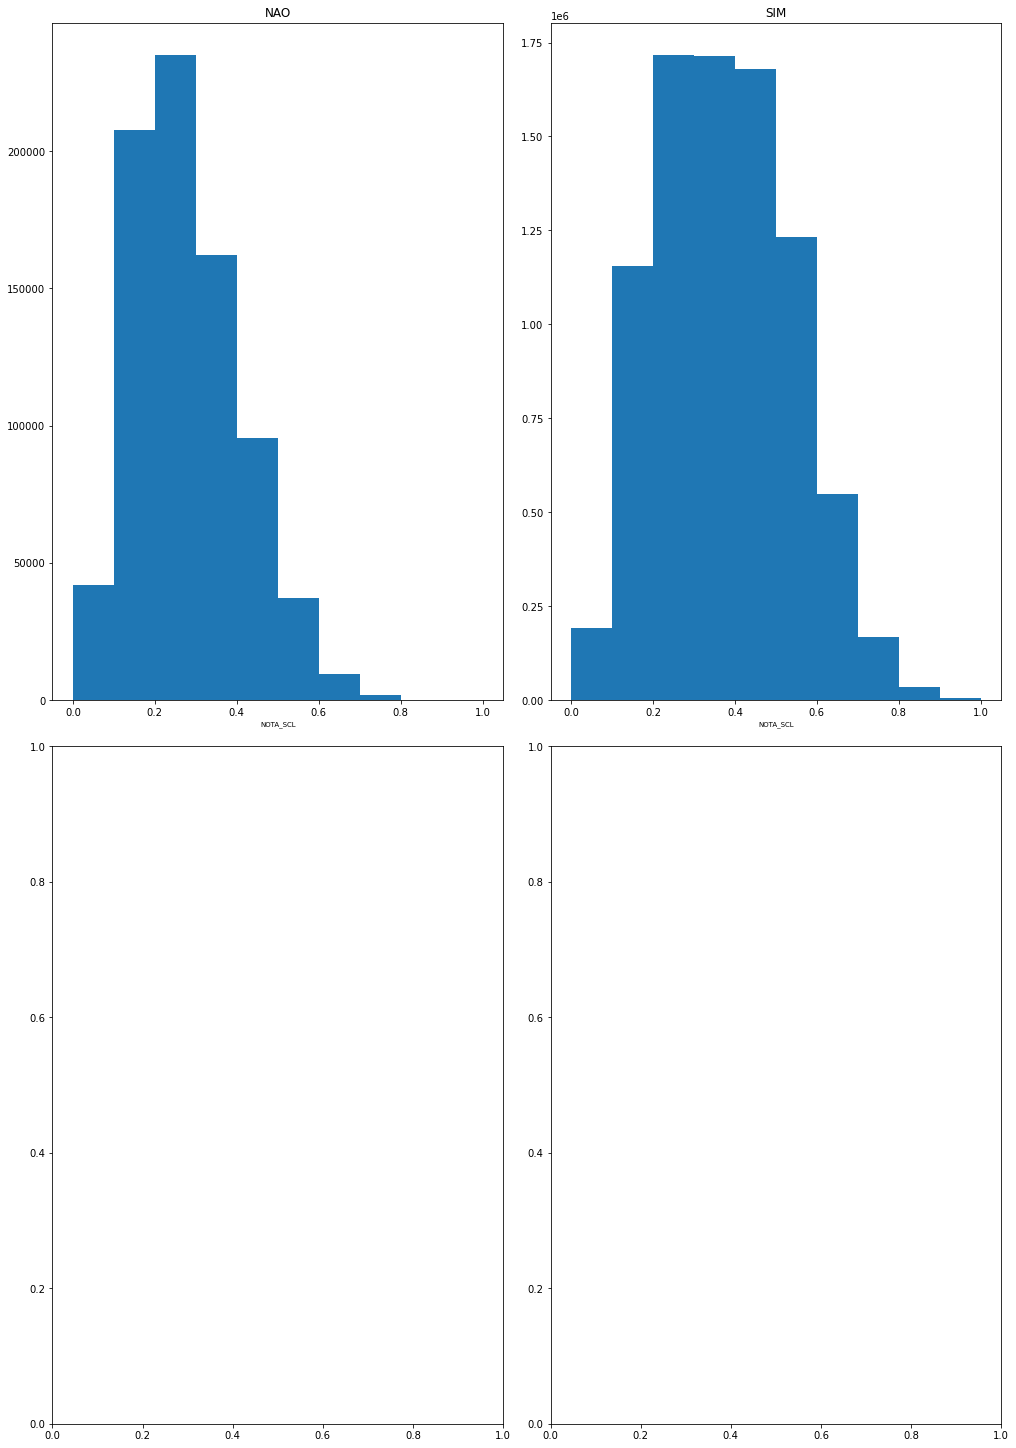

In [10]:
titulo = f'Avaliação da variação da Nota {nota} por Faixa Etária.'
coluna_1 = 'TP_FAIXA_ETARIA'                  # Classes
vrl_k = ['<17', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
         '56-60', '61-65', '66-70', '>70']
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = False
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Classes
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Raça'
coluna_1 = 'TP_COR_RACA'                  # Classes
Dicionario_Labels = {'Nao declarado':0, 'Branca':1, 'Preta':2, 'Parda':3, 'Amarela':4, 'Indigena':5, 'Nao dispoe da informacao':6}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Ano de Conclusão Ensino Médio.'
coluna_1 = 'TP_ANO_CONCLUIU'                  # Classes
vrl_k = ['Nao informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
         '2009', '2008', '2007', 'Antes 2007']
vrl_v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Escola Pública/Privada.'
coluna_1 = 'TP_ESCOLA'                  # Classes
Dicionario_Labels = {'Nao Respondeu':1, 'Publica':2, 'Privada':3}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por região da aplicação da prova.'
coluna_1 = 'SG_UF_PROVA'                  # Classes
Dicionario_Labels = {}
UF = sorted(base['SG_UF_PROVA'].unique())
for i in UF:
    Dicionario_Labels[i] = i
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Homem.'
coluna_1 = 'Q001'                  # Classes
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Mulher.'
coluna_1 = 'Q002'                  # Classes
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Qtd de Residentes.'
coluna_1 = 'Q005'                  # Classes
vrl_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Classes
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Celulares na Residência'
coluna_1 = 'Q022'                  # Classes
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Computadores na Residência'
coluna_1 = 'Q024'                  # Classes
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Acesso a Internet na Residência'
coluna_1 = 'Q025'                  # Classes
Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()


Avaliação da variação da Nota Global pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,470894.00,2273976.00,1438971.00,1148044.00,592850.00,690188.00,604747.00,485692.00,308278.00,191698.00,151640.00,133008.00,195533.00,122601.00,134240.00,134146.00,164210.00
count_%,5.10,24.61,15.57,12.42,6.42,7.47,6.54,5.26,3.34,2.07,1.64,1.44,2.12,1.33,1.45,1.45,1.78
mean,0.27,0.30,0.34,0.36,0.38,0.39,0.41,0.43,0.44,0.46,0.46,0.47,0.48,0.49,0.50,0.51,0.52
std,0.13,0.14,0.14,0.15,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01
25%,0.18,0.19,0.22,0.24,0.26,0.27,0.30,0.31,0.33,0.34,0.35,0.36,0.37,0.39,0.40,0.41,0.42
50%,0.25,0.28,0.32,0.35,0.38,0.39,0.42,0.44,0.45,0.47,0.48,0.48,0.49,0.50,0.51,0.52,0.53
75%,0.36,0.39,0.44,0.46,0.49,0.50,0.53,0.54,0.56,0.57,0.58,0.58,0.59,0.60,0.61,0.62,0.63
max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


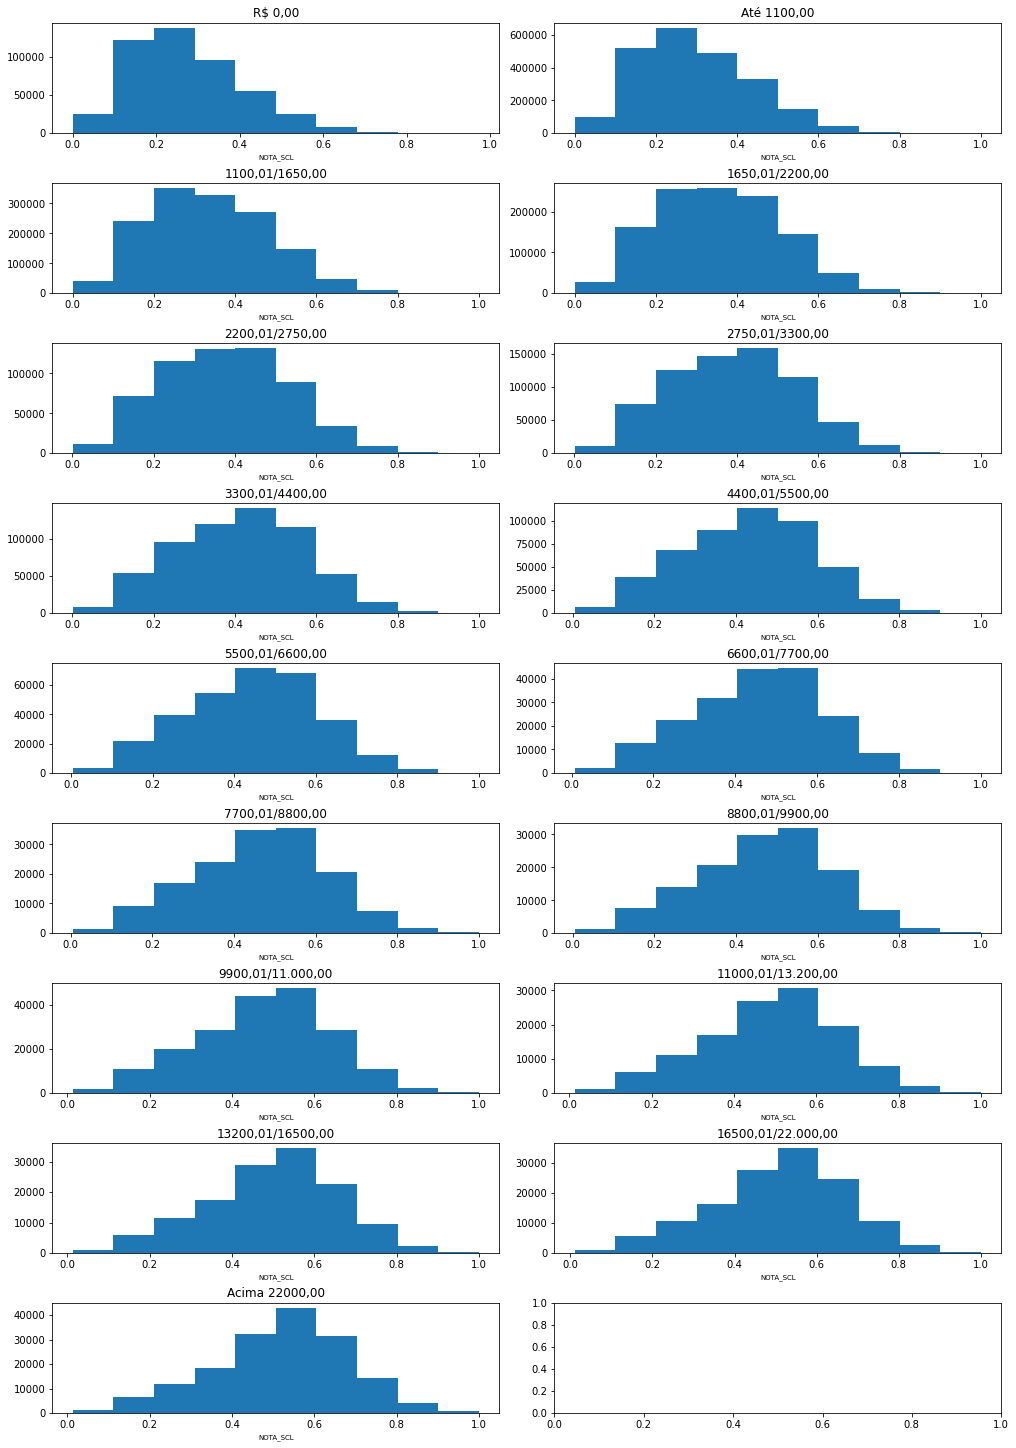

In [11]:
# Histograma da Nota pela Renda

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
#Outliers = True
#Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()


Avaliação da variação da Nota >= 0,52 pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,23613.00,155036.00,163795.00,170138.00,111423.00,147934.00,159521.00,148662.00,104502.00,71074.00,58671.00,53794.00,83517.00,56309.00,64738.00,68150.00,88222.00
count_%,1.37,8.97,9.47,9.84,6.44,8.56,9.23,8.60,6.04,4.11,3.39,3.11,4.83,3.26,3.74,3.94,5.10
mean,0.59,0.59,0.59,0.60,0.60,0.60,0.61,0.61,0.62,0.62,0.62,0.62,0.62,0.63,0.63,0.63,0.64
std,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.09,0.09
min,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52
25%,0.54,0.54,0.54,0.55,0.55,0.55,0.55,0.55,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.57,0.57
50%,0.57,0.57,0.57,0.58,0.58,0.58,0.59,0.59,0.60,0.60,0.60,0.60,0.61,0.61,0.61,0.62,0.62
75%,0.62,0.62,0.62,0.63,0.63,0.64,0.64,0.65,0.66,0.66,0.67,0.67,0.67,0.68,0.68,0.68,0.69
max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


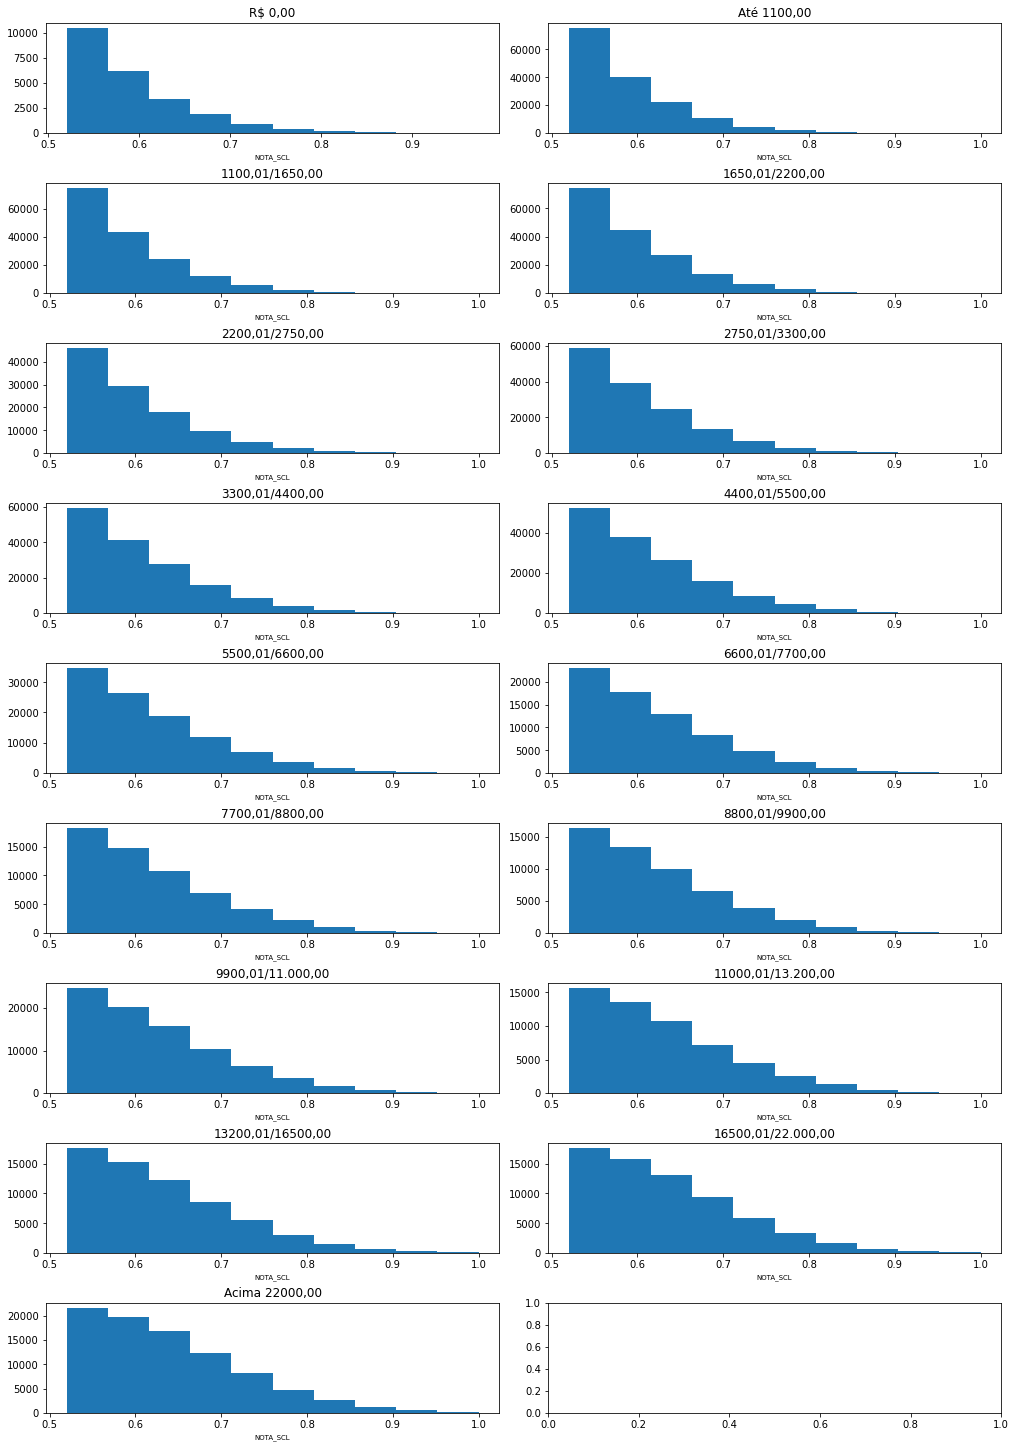

In [12]:
# Histograma da Nota >= 0,52 pela Renda

coluna_2 = 'NOTA_SCL'
base = DF_GLBL.loc[DF_GLBL.loc[:, coluna_2] >= 0.52]
nota = '>= 0,52'

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
#Outliers = True
#Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()


Avaliação da variação da Nota Global pela Renda Mensal da Instituição de Ensino (Não Respondeu) 


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,286763.00,1403119.00,921133.00,723642.00,364707.00,424596.00,374090.00,300739.00,192412.00,120453.00,94723.00,84467.00,122871.00,77714.00,83771.00,83667.00,99415.00
count_%,4.98,24.37,16.00,12.57,6.33,7.37,6.50,5.22,3.34,2.09,1.64,1.47,2.13,1.35,1.45,1.45,1.73
mean,0.28,0.31,0.34,0.37,0.39,0.40,0.42,0.44,0.45,0.47,0.47,0.48,0.48,0.49,0.50,0.51,0.51
std,0.14,0.14,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01
25%,0.18,0.20,0.23,0.25,0.27,0.28,0.30,0.32,0.34,0.35,0.36,0.36,0.37,0.39,0.39,0.40,0.41
50%,0.26,0.29,0.33,0.36,0.39,0.41,0.43,0.45,0.46,0.48,0.48,0.49,0.50,0.51,0.51,0.52,0.52
75%,0.37,0.40,0.45,0.48,0.50,0.52,0.54,0.56,0.57,0.58,0.59,0.59,0.60,0.61,0.61,0.62,0.62
max,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


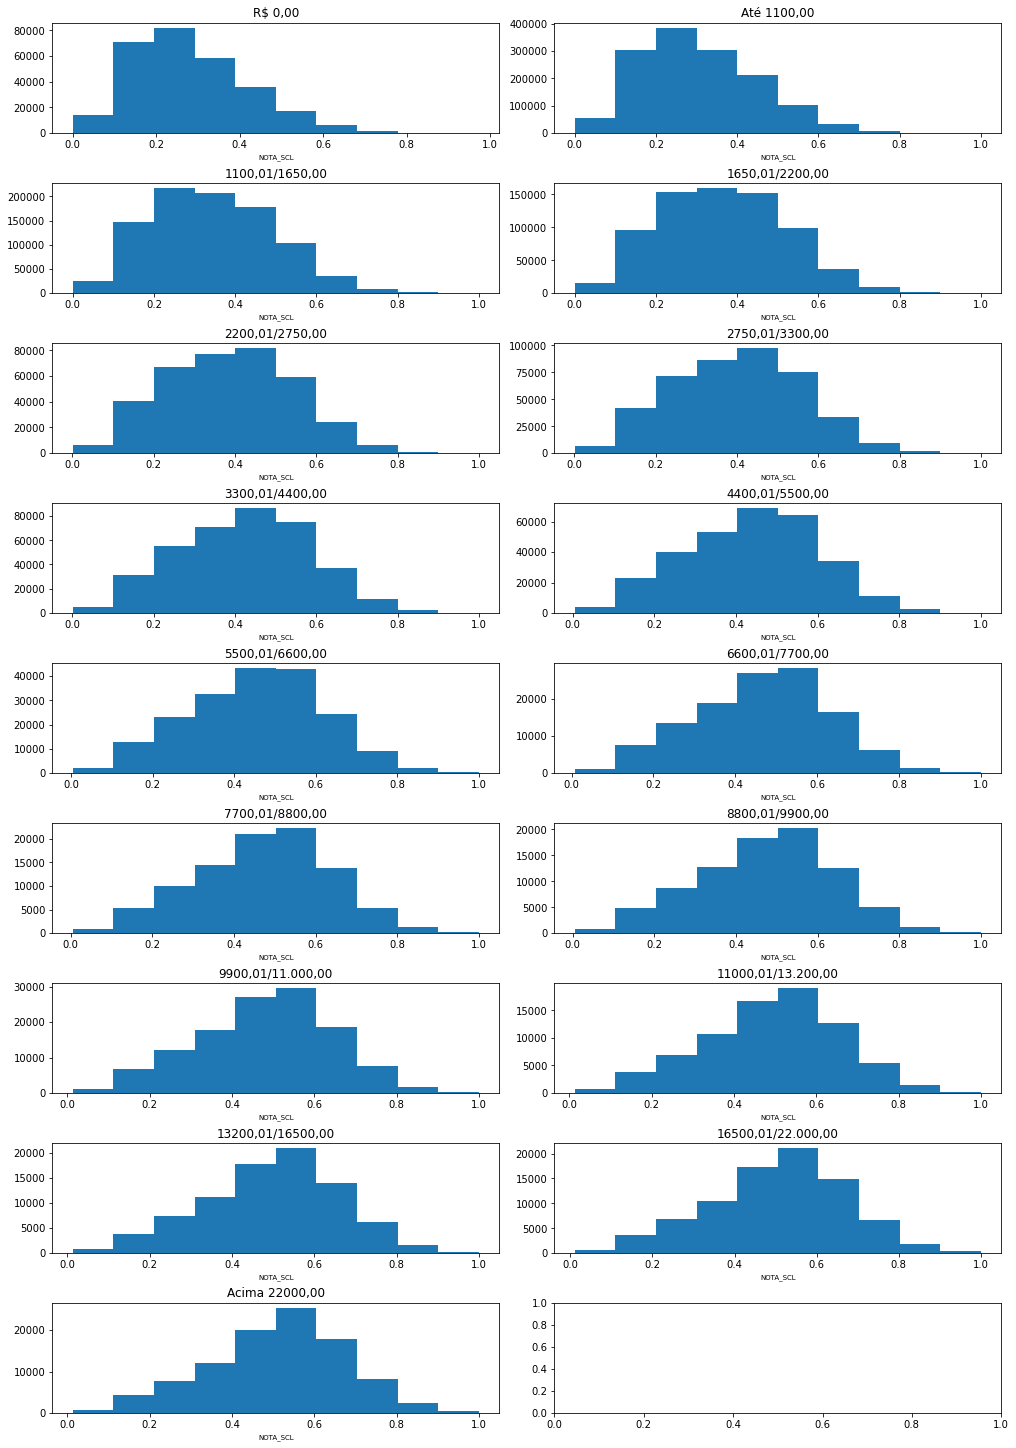




Avaliação da variação da Nota Global pela Renda Mensal da Instituição de Ensino (Publica) 


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,179324.00,843891.00,480453.00,373303.00,189643.00,207472.00,165476.00,112989.00,63216.00,35818.00,25577.00,19307.00,23518.00,12643.00,11264.00,7998.00,5780.00
count_%,6.50,30.60,17.42,13.54,6.88,7.52,6.00,4.10,2.29,1.30,0.93,0.70,0.85,0.46,0.41,0.29,0.21
mean,0.26,0.28,0.32,0.33,0.35,0.36,0.38,0.39,0.41,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48
std,0.12,0.13,0.13,0.14,0.14,0.14,0.15,0.15,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.17,0.17
min,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.02,0.02,0.01,0.02,0.02,0.04
25%,0.17,0.18,0.21,0.22,0.24,0.25,0.26,0.28,0.29,0.30,0.31,0.31,0.32,0.34,0.35,0.36,0.36
50%,0.24,0.27,0.31,0.32,0.35,0.36,0.38,0.40,0.41,0.42,0.43,0.44,0.45,0.47,0.48,0.49,0.49
75%,0.33,0.37,0.41,0.43,0.46,0.46,0.49,0.50,0.52,0.53,0.54,0.54,0.55,0.57,0.58,0.59,0.60
max,0.95,0.96,0.94,1.00,0.97,1.00,1.00,0.99,0.99,1.00,0.99,0.96,0.99,1.00,0.99,1.00,1.00


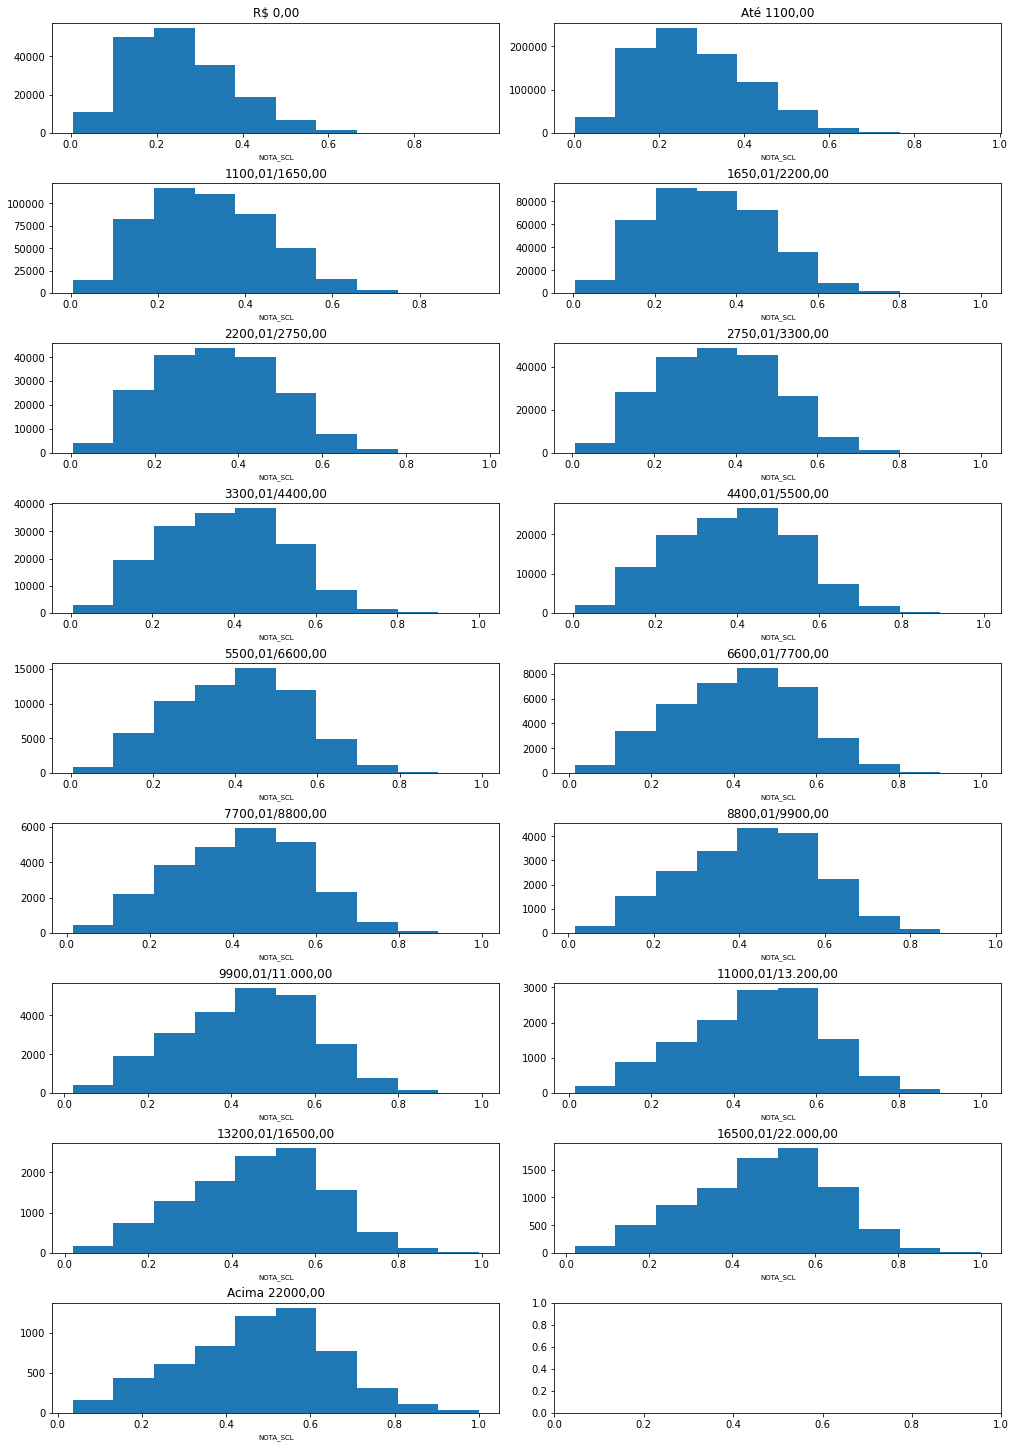




Avaliação da variação da Nota Global pela Renda Mensal da Instituição de Ensino (Privada) 


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,4807.00,26966.00,37385.00,51099.00,38500.00,58120.00,65181.00,71964.00,52650.00,35427.00,31340.00,29234.00,49144.00,32244.00,39205.00,42481.00,59015.00
count_%,0.66,3.72,5.16,7.05,5.31,8.02,8.99,9.93,7.26,4.89,4.32,4.03,6.78,4.45,5.41,5.86,8.14
mean,0.38,0.37,0.39,0.40,0.41,0.42,0.44,0.45,0.46,0.47,0.47,0.48,0.49,0.50,0.51,0.52,0.54
std,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.16,0.15,0.16,0.16
min,0.03,0.02,0.01,0.01,0.03,0.02,0.00,0.02,0.01,0.03,0.01,0.01,0.02,0.01,0.03,0.04,0.02
25%,0.26,0.25,0.28,0.29,0.30,0.31,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.42,0.43,0.45
50%,0.38,0.36,0.39,0.40,0.42,0.43,0.45,0.46,0.47,0.48,0.48,0.49,0.50,0.51,0.52,0.53,0.55
75%,0.50,0.47,0.50,0.51,0.52,0.53,0.54,0.56,0.56,0.57,0.58,0.58,0.59,0.60,0.61,0.62,0.64
max,0.90,0.96,1.00,1.00,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


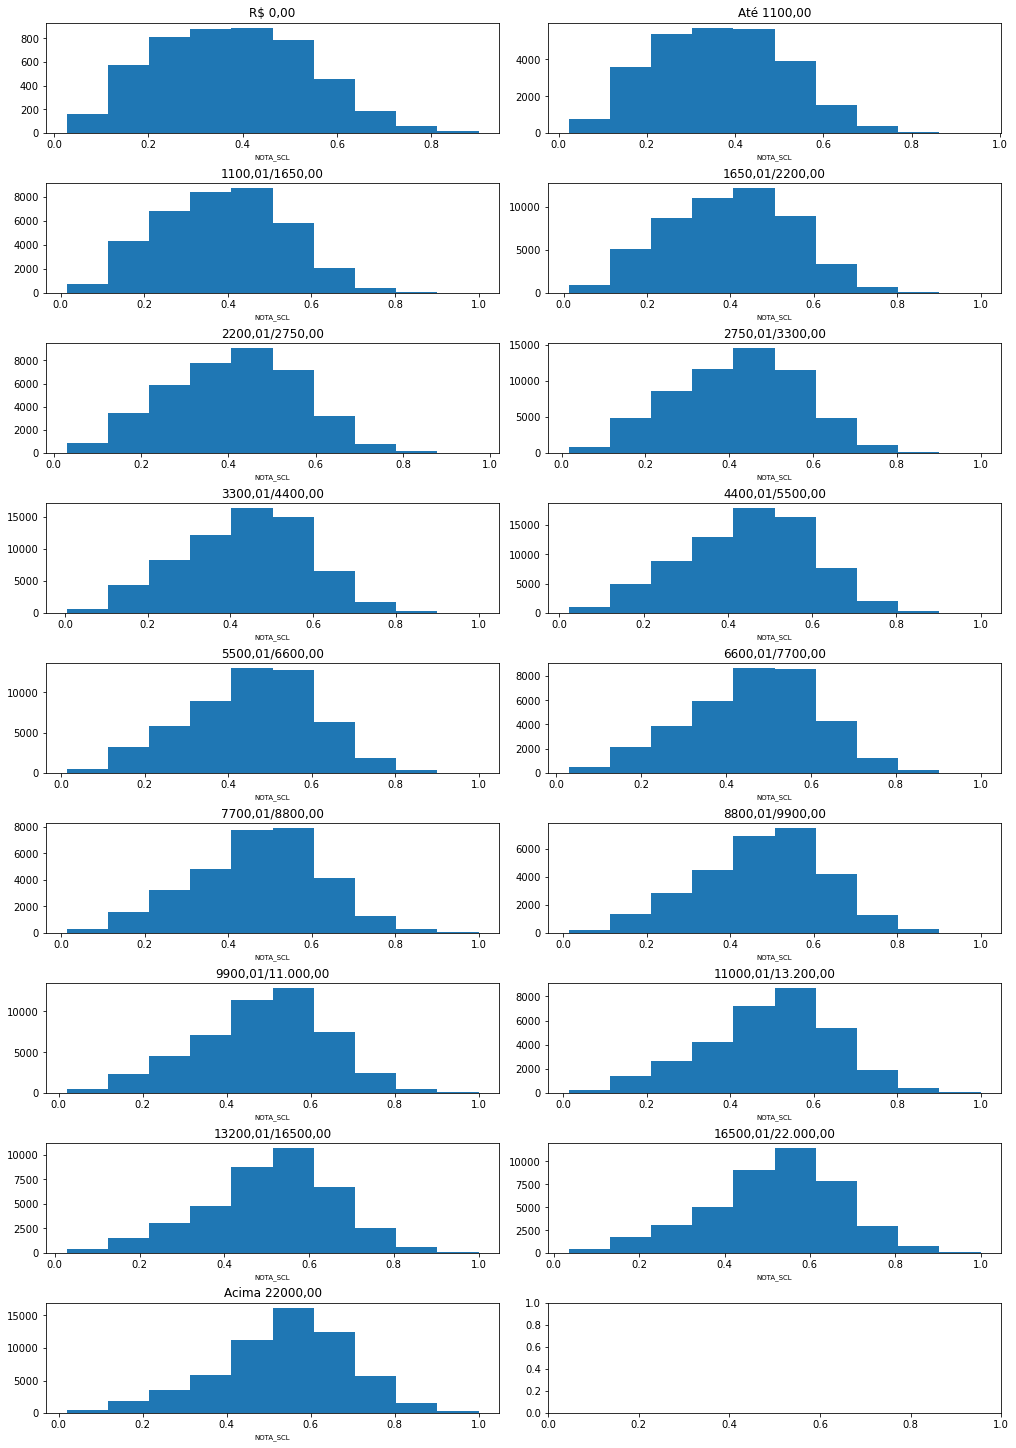

In [8]:
# Instituição de ensino pela nota sobre a renda

coluna_2 = 'NOTA_SCL'        # Notas Globais Normalizadas
base = DF_GLBL.loc[DF_GLBL.loc[:,'TP_ESCOLA'] == 1]
nota = 'Global'

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal da Instituição de Ensino (Não Respondeu) '
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
#Outliers = True
#Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

base = DF_GLBL.loc[DF_GLBL.loc[:,'TP_ESCOLA'] == 2]

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal da Instituição de Ensino (Publica) '
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
#Outliers = True
#Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

base = DF_GLBL.loc[DF_GLBL.loc[:,'TP_ESCOLA'] == 3]

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal da Instituição de Ensino (Privada) '
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
#Outliers = True
#Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()


Avaliação da variação da Nota Global pela Qtd de Computadores na Residência com acesso a internet


,0,1,2,3,4+
count,2754936.00,3854563.00,1139933.00,461411.00,239324.00
count_%,32.60,45.62,13.49,5.46,2.83
mean,0.31,0.38,0.45,0.48,0.51
std,0.14,0.16,0.16,0.16,0.16
min,0.00,0.00,0.00,0.00,0.01
25%,0.20,0.26,0.33,0.38,0.41
50%,0.29,0.38,0.46,0.50,0.52
75%,0.40,0.49,0.56,0.60,0.62
max,1.00,1.00,1.00,1.00,1.00


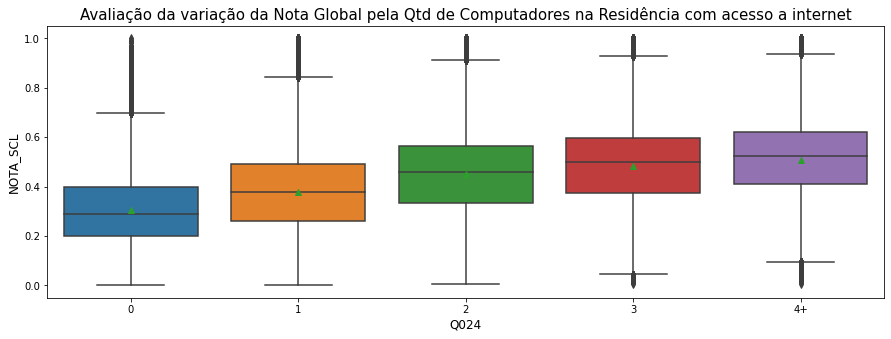

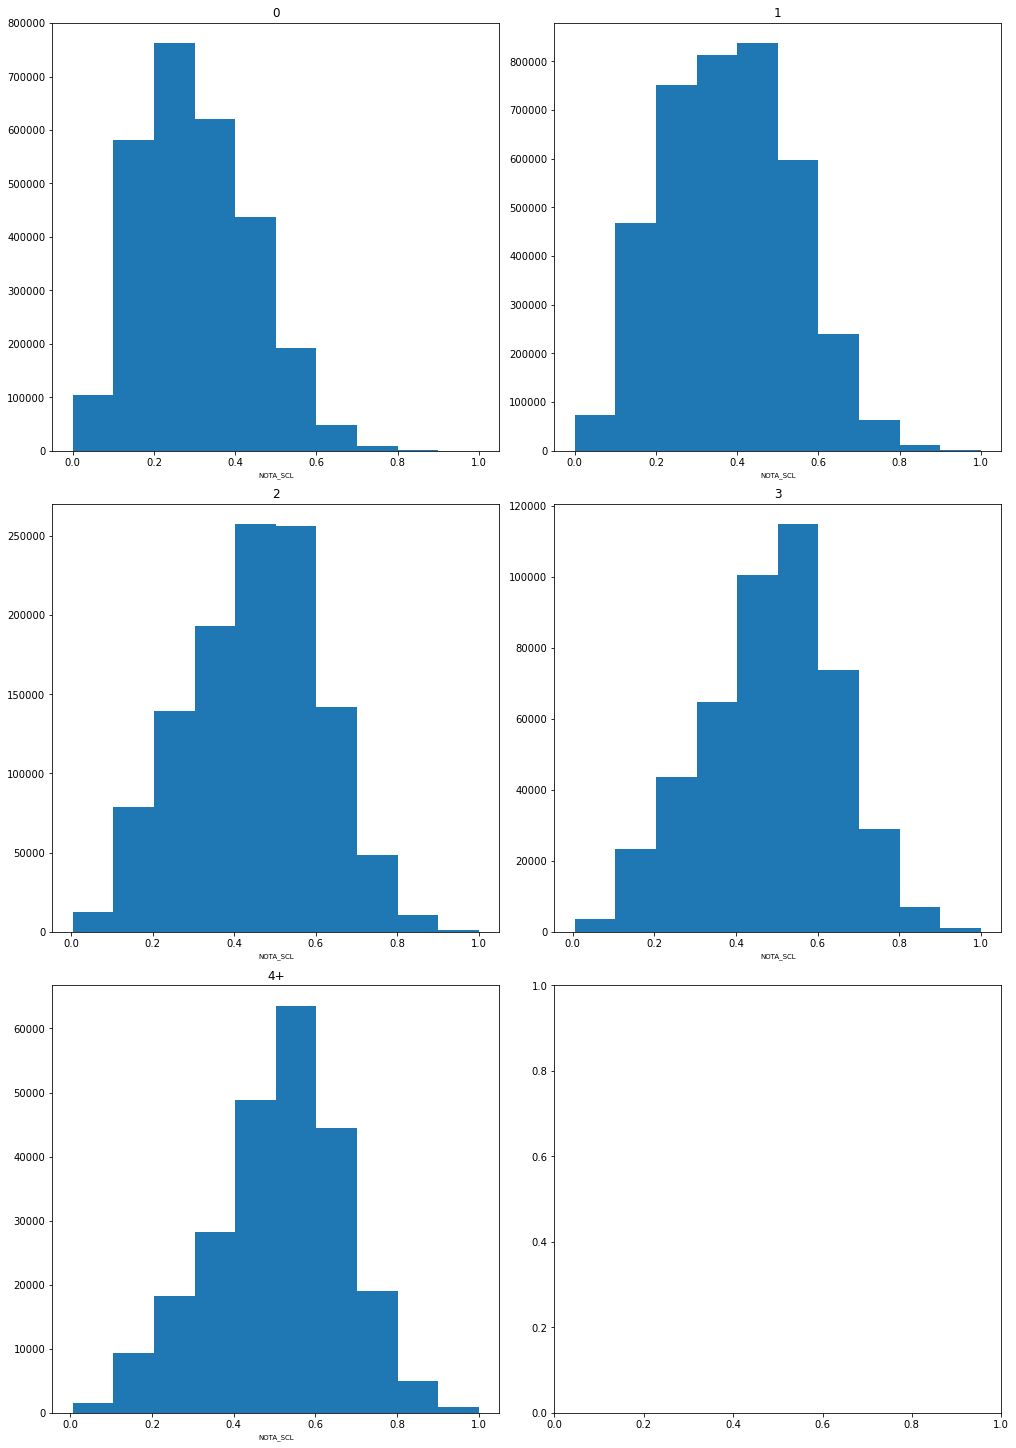

In [11]:
# Variação da nota pela qtd de computadores com acesso a internet

coluna_2 = 'NOTA_SCL'        # Notas Globais Normalizadas
base = DF_GLBL.loc[DF_GLBL.loc[:,'Q025'] == 'B']
nota = 'Global'

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Computadores na Residência com acesso a internet'
coluna_1 = 'Q024'                  # Classes
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()


Avaliação da variação da Nota Global pela renda para quem tem 1 computador com acesso a internet


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,80179.00,642940.00,671394.00,633636.00,348060.00,409694.00,344464.00,249076.00,140680.00,78731.00,56038.00,45570.00,56551.00,30363.00,27173.00,21500.00,18514.00
count_%,2.08,16.68,17.42,16.44,9.03,10.63,8.94,6.46,3.65,2.04,1.45,1.18,1.47,0.79,0.70,0.56,0.48
mean,0.33,0.34,0.36,0.37,0.38,0.39,0.41,0.42,0.43,0.44,0.44,0.45,0.45,0.47,0.47,0.48,0.48
std,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02,0.03,0.01,0.03,0.02
25%,0.21,0.22,0.24,0.25,0.27,0.28,0.29,0.30,0.31,0.32,0.32,0.33,0.34,0.36,0.36,0.37,0.37
50%,0.31,0.32,0.35,0.36,0.38,0.39,0.41,0.43,0.44,0.45,0.45,0.46,0.46,0.48,0.48,0.50,0.49
75%,0.44,0.44,0.46,0.48,0.49,0.50,0.52,0.53,0.54,0.55,0.55,0.56,0.56,0.58,0.59,0.60,0.60
max,0.97,1.00,1.00,1.00,0.99,1.00,1.00,0.99,1.00,1.00,0.99,0.99,1.00,1.00,0.99,1.00,1.00


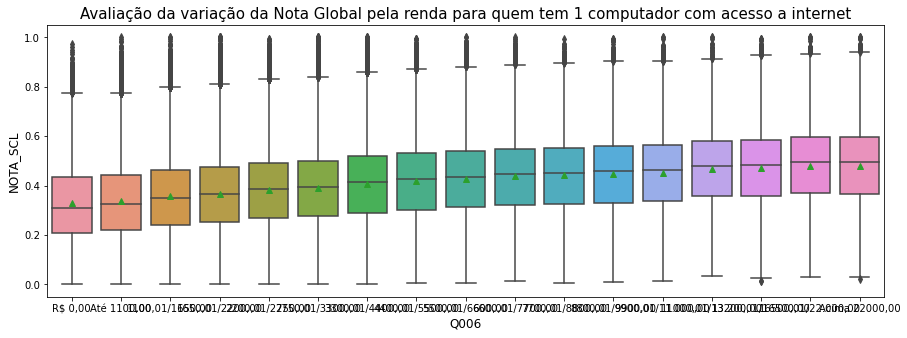

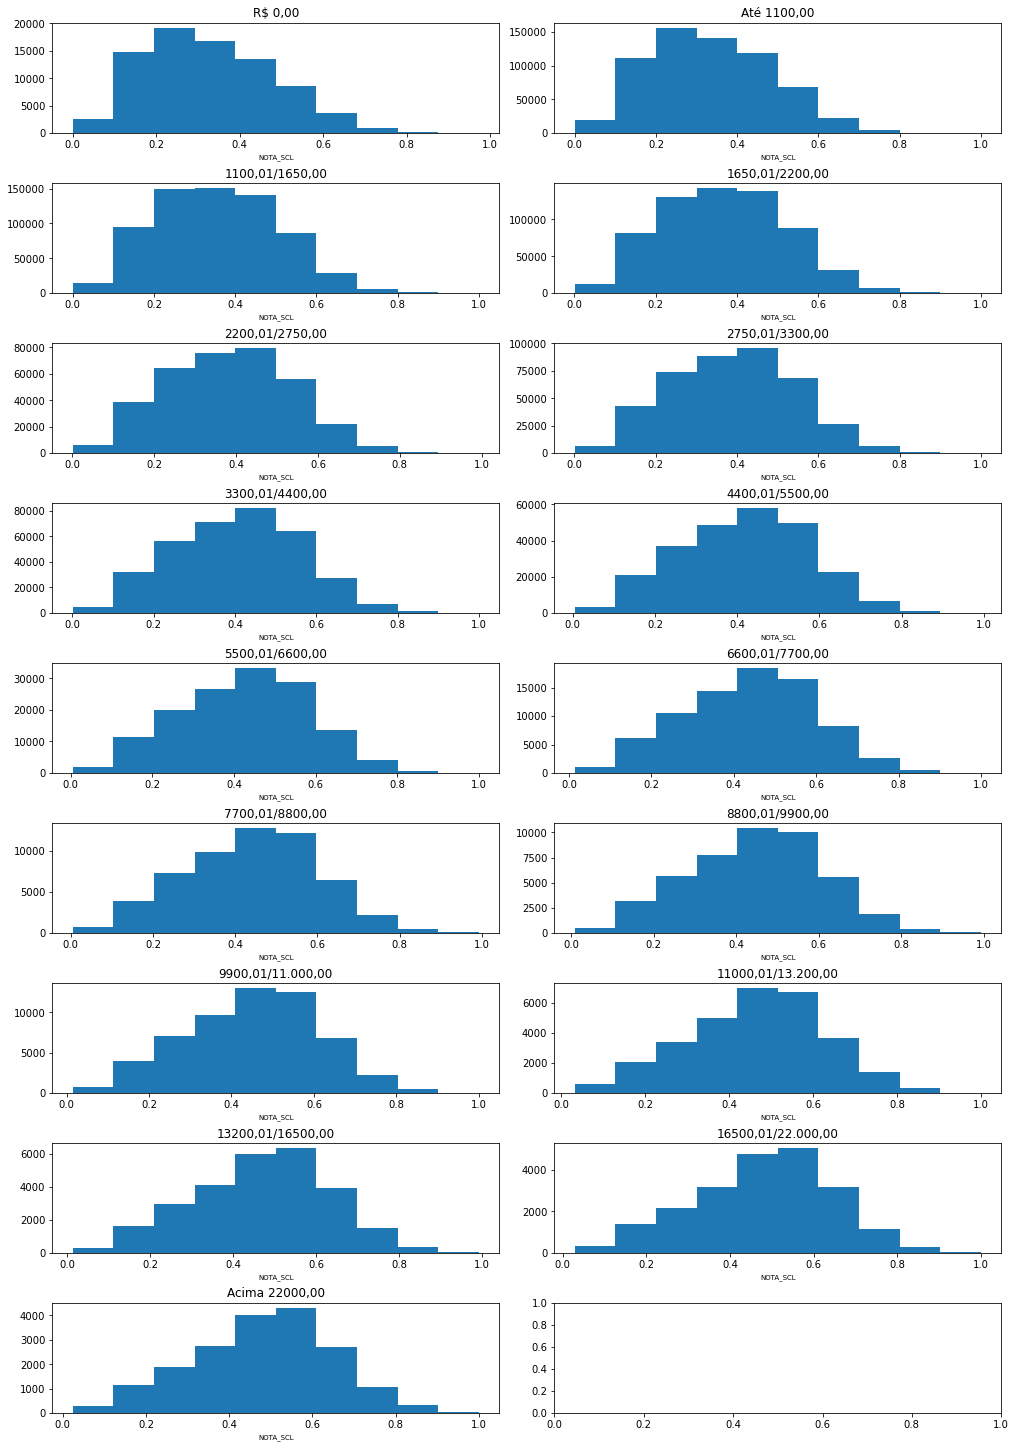

In [14]:
# Variação da nota pela renda para quem tem 1 computador com acesso a internet

coluna_2 = 'NOTA_SCL'        # Notas Globais Normalizadas
base = DF_GLBL.loc[DF_GLBL.loc[:,'Q025'] == 'B']
base = base.loc[base.loc[:,'Q024'] == 'B']
nota = 'Global'

titulo = f'Avaliação da variação da Nota {nota} pela renda para quem tem 1 computador com acesso a internet'
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()


Avaliação da variação da Nota Global pela renda para quem tem 0 computador sem acesso a internet


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,162126.00,405740.00,93226.00,34423.00,8874.00,5931.00,2716.00,1173.00,495.00,240.00,118.00,76.00,78.00,34.00,30.00,20.00,42.00
count_%,22.66,56.72,13.03,4.81,1.24,0.83,0.38,0.16,0.07,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.01
mean,0.25,0.27,0.29,0.31,0.32,0.33,0.35,0.37,0.37,0.38,0.38,0.36,0.36,0.39,0.41,0.35,0.41
std,0.12,0.12,0.13,0.14,0.14,0.14,0.15,0.16,0.16,0.16,0.17,0.16,0.16,0.18,0.14,0.16,0.17
min,0.00,0.00,0.00,0.00,0.01,0.01,0.03,0.02,0.00,0.07,0.07,0.05,0.12,0.12,0.11,0.07,0.10
25%,0.16,0.17,0.19,0.20,0.21,0.22,0.23,0.23,0.23,0.27,0.25,0.24,0.22,0.27,0.29,0.19,0.27
50%,0.24,0.25,0.28,0.29,0.31,0.32,0.34,0.36,0.37,0.36,0.35,0.33,0.36,0.36,0.42,0.38,0.37
75%,0.32,0.35,0.38,0.40,0.42,0.44,0.46,0.49,0.48,0.49,0.49,0.47,0.49,0.50,0.53,0.46,0.54
max,0.96,0.92,0.97,0.88,0.88,0.85,0.89,0.93,0.88,0.74,0.72,0.75,0.70,0.78,0.66,0.62,0.76


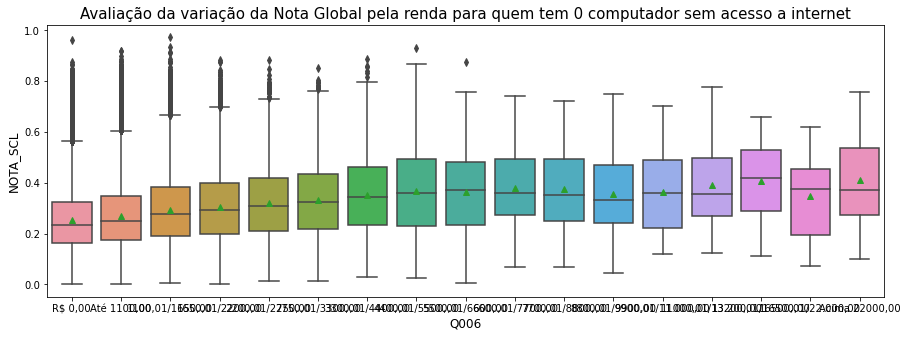

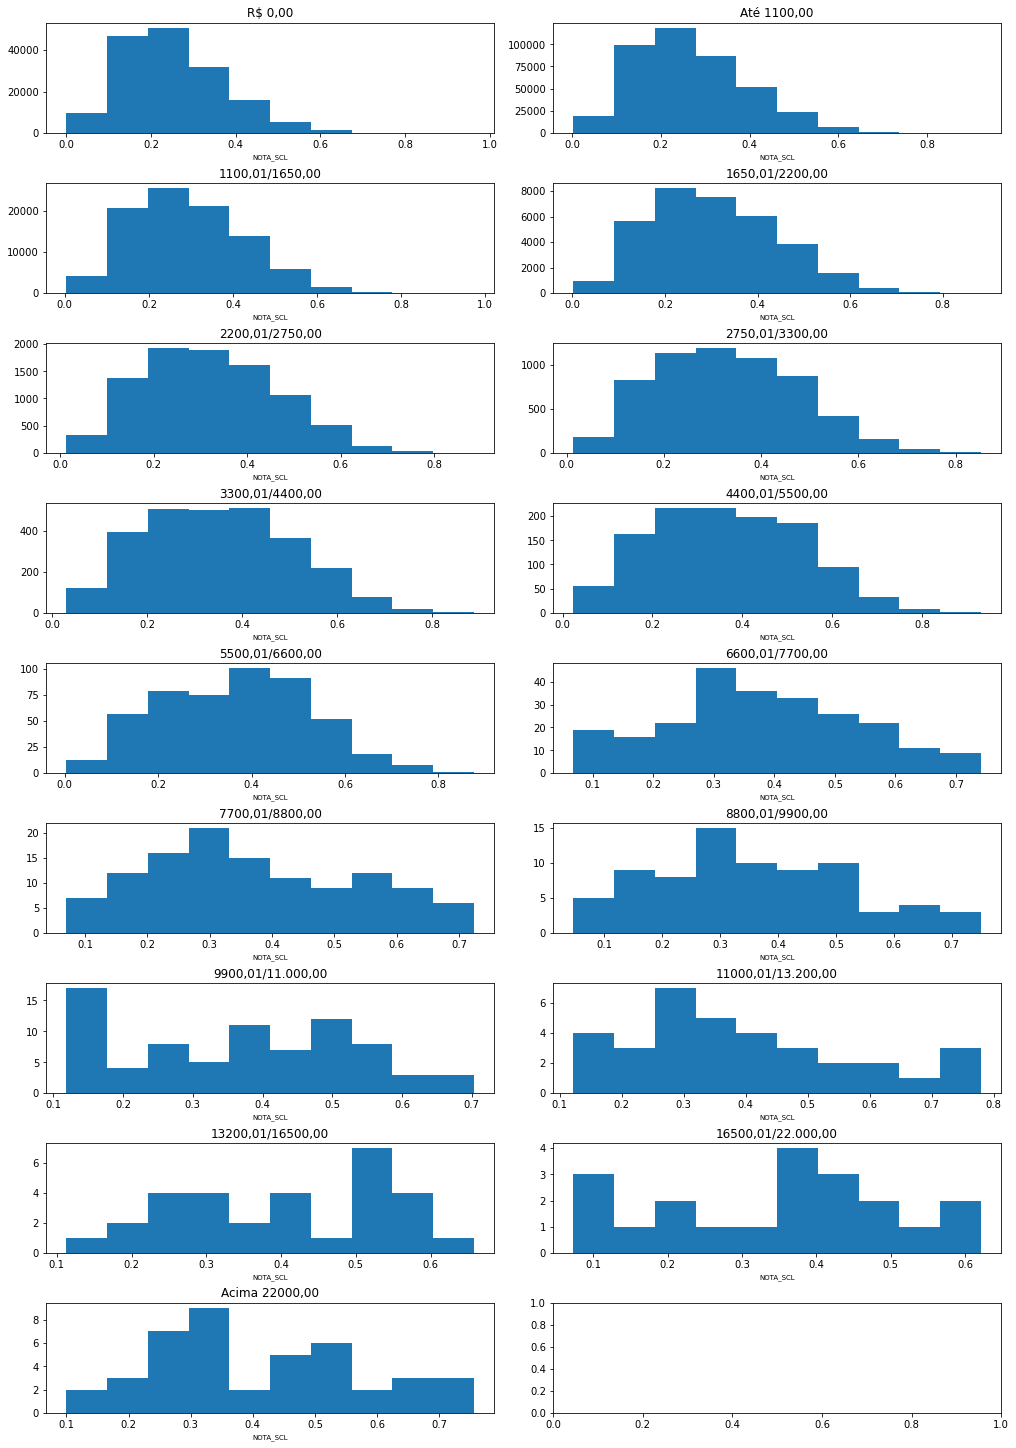

In [15]:
# Variação da nota pela renda para quem tem 0 computador sem acesso a internet

coluna_2 = 'NOTA_SCL'        # Notas Globais Normalizadas
base = DF_GLBL.loc[DF_GLBL.loc[:,'Q025'] == 'A']
base = base.loc[base.loc[:,'Q024'] == 'A']
nota = 'Global'

titulo = f'Avaliação da variação da Nota {nota} pela renda para quem tem 0 computador sem acesso a internet'
coluna_1 = 'Q006'                  # Classes
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

# Gênero

In [ ]:
Enem_21.sample(5)


Avaliação da variação da Nota LC por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,1469154.00,906977.00
count_%,61.83,38.17
mean,0.39,0.40
std,0.15,0.15
min,0.00,0.00
25%,0.28,0.30
50%,0.39,0.41
75%,0.49,0.51
max,1.00,0.98


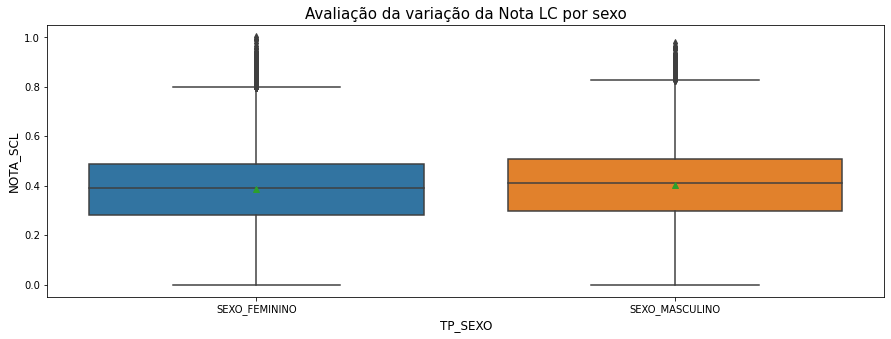

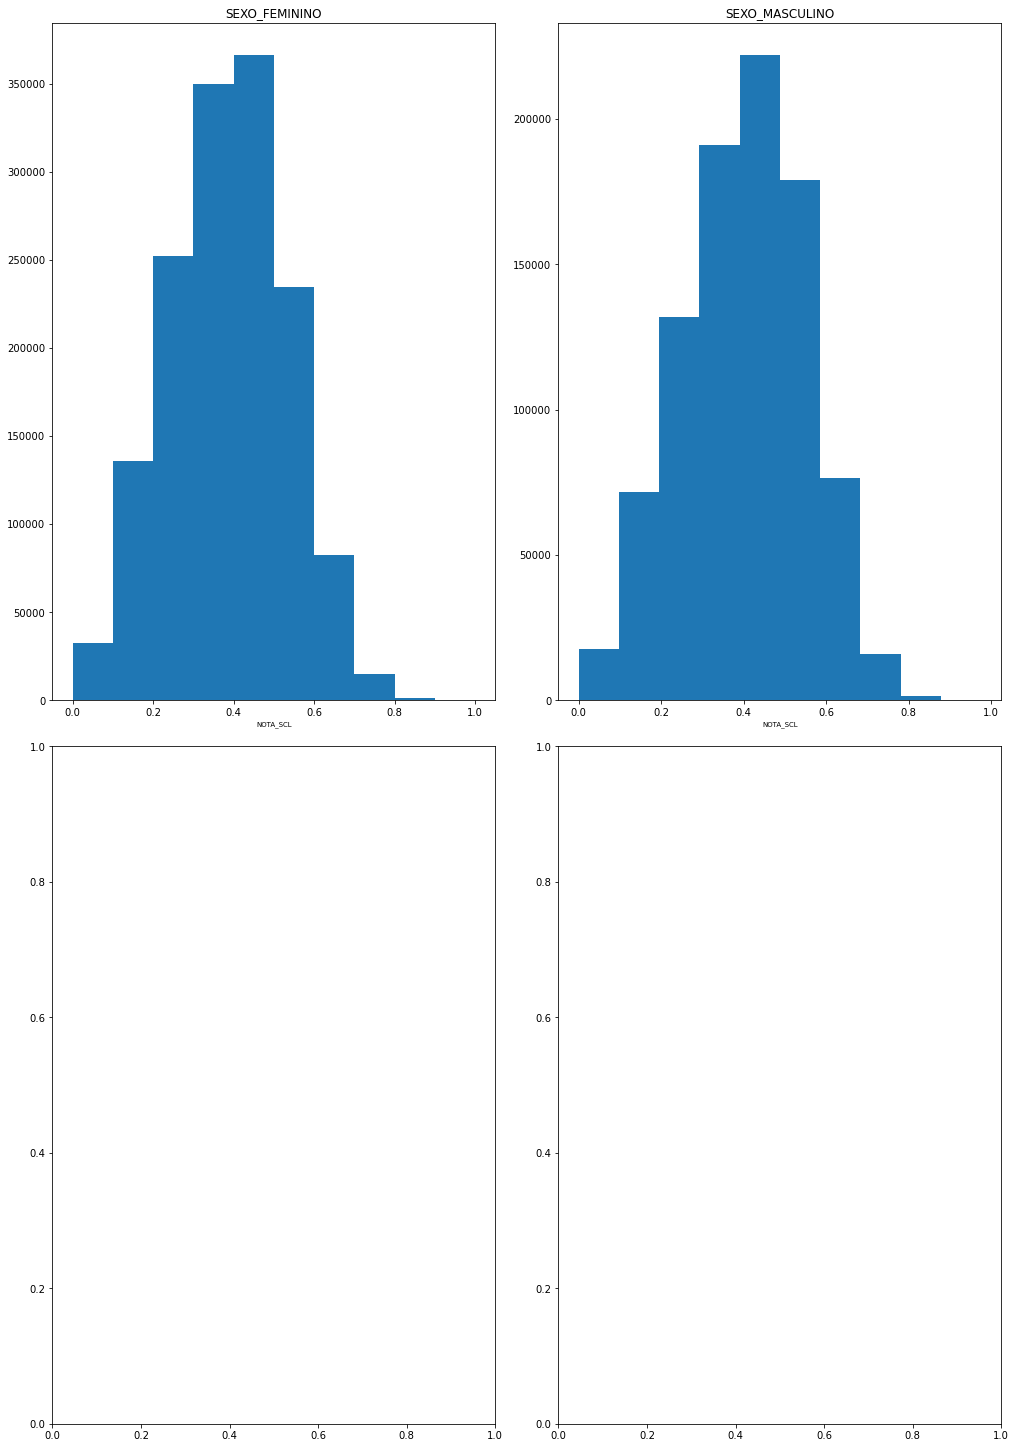

In [18]:
# Gênero prova LC

coluna_2 = 'NOTA_SCL'        
base = DF_LC
nota = 'LC'


titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Clases
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

## Redação


Avaliação da variação da Nota Redação por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,1423772.00,870025.00
count_%,62.07,37.93
mean,644.78,621.95
std,154.06,149.41
min,40.00,40.00
25%,540.00,520.00
50%,620.00,600.00
75%,760.00,720.00
max,1000.00,1000.00


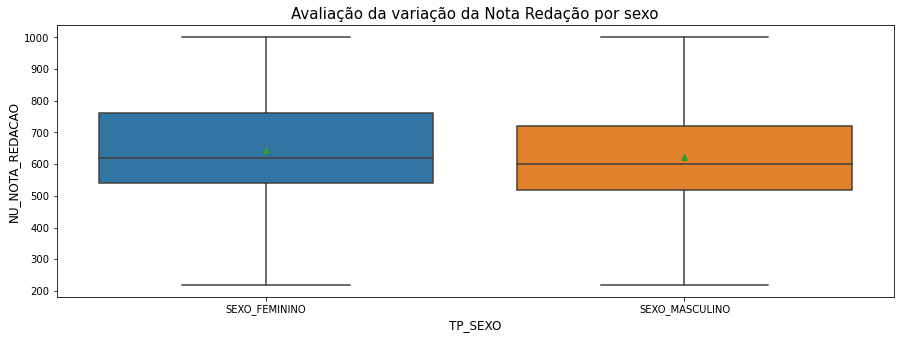

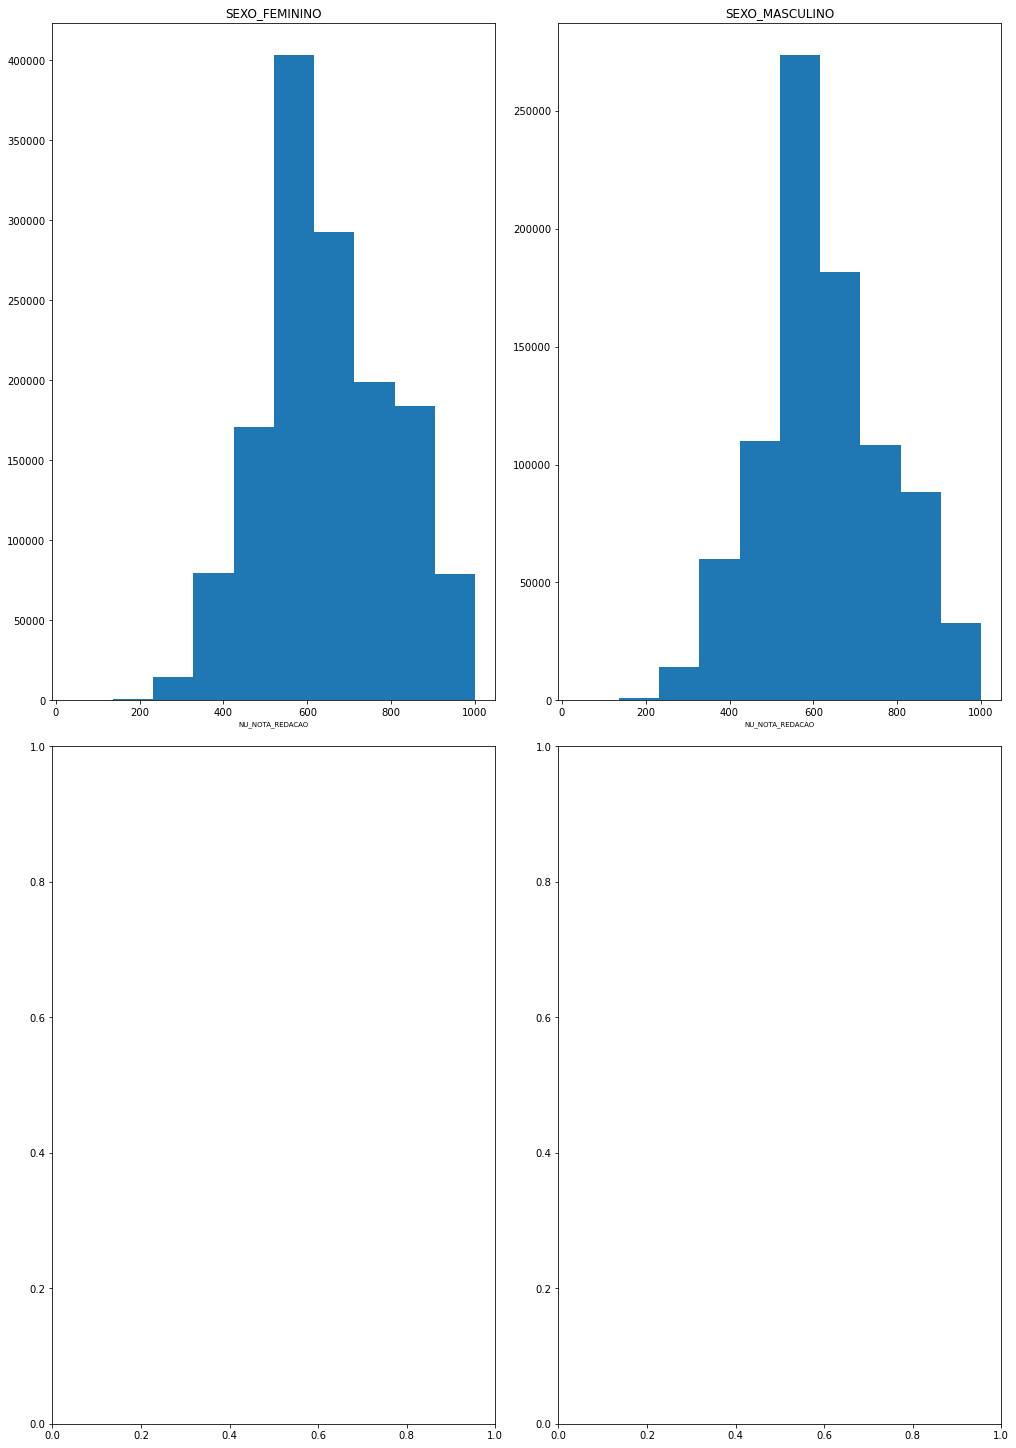

In [17]:
# Gênero Redação

coluna_2 = 'NU_NOTA_REDACAO'        
base = Enem_21.loc[Enem_21.loc[:,'TP_STATUS_REDACAO'] == 1.0]
nota = 'Redação'


titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Clases
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = False
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

# Renda

In [19]:
Enem_21.shape

(3389832, 55)

In [20]:
base = Enem_21

base_Enm_21 = base.loc[(base.loc[:,'TP_PRESENCA_CN'] == 1) | 
                                 (base.loc[:,'TP_PRESENCA_CH'] == 1) | 
                                 (base.loc[:,'TP_PRESENCA_LC'] == 1) | 
                                 (base.loc[:,'TP_PRESENCA_MT'] == 1)]
base_Enm_21.shape

(2386116, 55)

In [21]:
base_Enm_21 = base_Enm_21[base_Enm_21['Q006'].notnull()]
base_Enm_21.shape

(2386115, 55)

In [22]:
vrl_k = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
vrl_v = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
base_Enm_21['Q006_FX'] = base_Enm_21['Q006'].map(Dicionario_Labels)
base_Enm_21.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q014,Q019,Q022,Q024,Q025,Q006_FX
0,210053865474,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,574.6,472.6,NaN,1,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,B,B,B,B,B,"1650,01/2200,00"
1,210052384164,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,505.9,551.8,498.3,461.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,B,C,A,A,"Até 1100,00"
3,210052128335,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,580.7,678.9,638.9,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,B,B,B,B,"Até 1100,00"
4,210051353021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,497.7,532.4,457.6,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,B,B,E,B,B,"1100,01/1650,00"
6,210052615524,9,F,0,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4321600,Tramandaí,43,RS,0,1,1,0,NaN,511.9,420.4,NaN,1,1.0,100.0,120.0,100.0,120.0,40.0,480.0,B,C,B,B,3.0,C,A,B,D,A,A,B,B,B,C,A,B,"1100,01/1650,00"


In [ ]:
vrl_k = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
vrl_v = [0, 1100, 1375, 1925, 2475, 3025, 3850, 4950, 6050, 7150, 8250, 9350, 10450, 12100, 14850, 19250, 22000]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
base['Q006_MD'] = base['Q006'].map(Dicionario_Labels)

In [23]:
base_Enm_21 = base_Enm_21.sort_values('Q006', ascending=True)

### Bibliotéca de Funções

<hr>

In [24]:
# Esta função gera gráficos de Histograma, pelas classes das colunas desejadas.

def Hist_Plot (clmn_1, clmn_2):
    
    print(titulo)
    
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    figura = plt.figure(figsize=(14,14), constrained_layout=True)
    plt.rcParams['xtick.labelsize'] = 8
        
    fig_pos = 0
    
    for k, v in Dicionario_Labels.items():
        fig_pos += 1
        figura.add_subplot(qtd_lnh, 2, fig_pos)
        plt.hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=bins, rwidth=0.95)
        plt.title(k)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain', axis='y')
        
    plt.show()

In [45]:
# Esta função gera gráficos de Histograma, pelas classes das colunas desejadas.

def Hist_Plot_sbn (clmn_1, clmn_2):
    
    print(titulo)
    
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    figura = plt.figure(figsize=(14,17), constrained_layout=True)
    plt.rcParams['xtick.labelsize'] = 8
        
    fig_pos = 0
    
    for k, v in Dicionario_Labels.items():
        fig_pos += 1
        figura.add_subplot(qtd_lnh, 2, fig_pos)
        sbn.countplot(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], color='#376ead', order=bins )
        plt.title(k)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain', axis='y')
        plt.xlabel("")
        plt.ylabel("")
        
    plt.show()

In [ ]:
# Avaliação da variação da média por

titulo = ''
coluna_1 = ''                  # Classes
coluna_2 = ''                  # Notas
base = 
bins = []

vrl_k = []
vrl_v = sorted(base[coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
Dicionario_Labels = {}


display(Estat_Desc(coluna_1, coluna_2))

Outliers = True

Box_Plot(coluna_1, coluna_2)

Hist_Plot(coluna_1, coluna_2)

print('=======================================================================================================================')

<hr>

Avaliação da variação da Renda por Raça


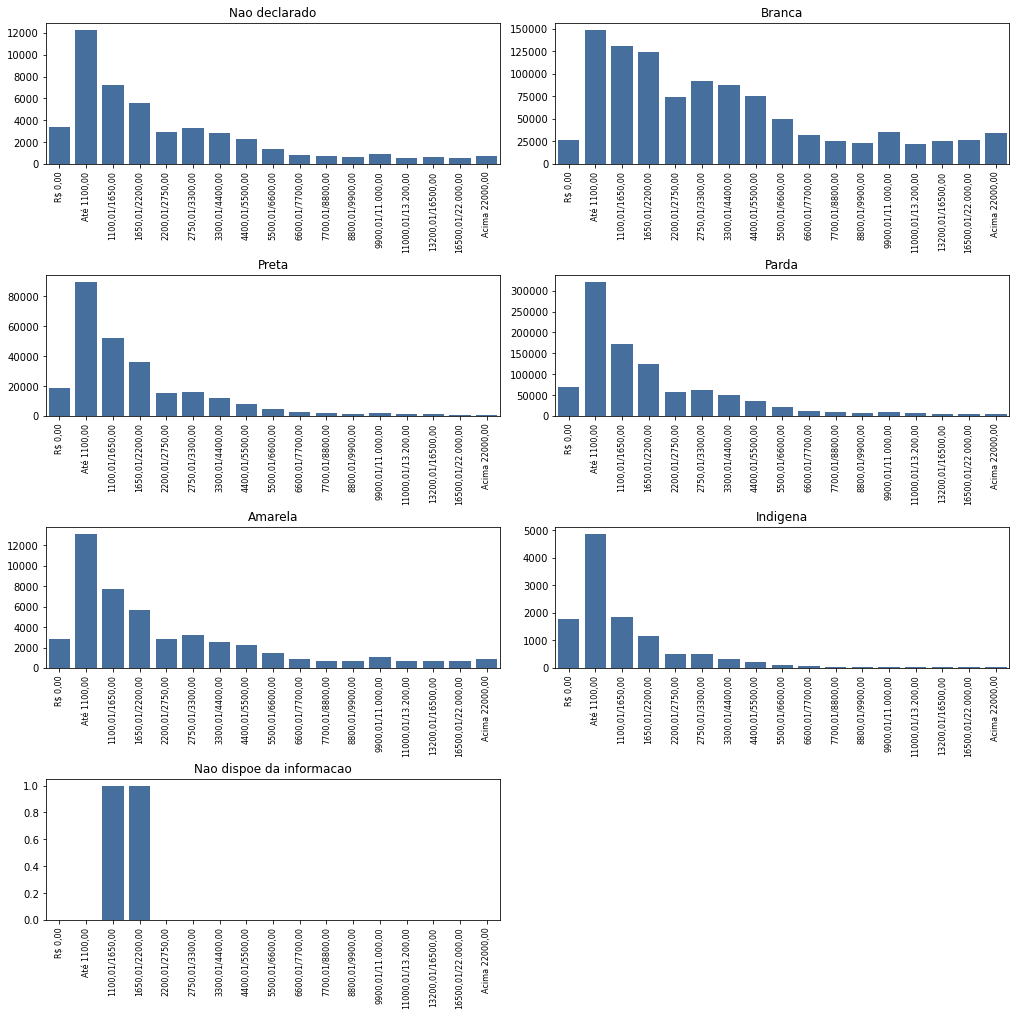

In [26]:
titulo = f'Avaliação da variação da Renda por Raça'
coluna_1 = 'TP_COR_RACA'                  # Classes
coluna_2 = 'Q006_FX'
base = base_Enm_21
bins = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']

Dicionario_Labels = {'Nao declarado':0, 'Branca':1, 'Preta':2, 'Parda':3, 'Amarela':4, 'Indigena':5, 'Nao dispoe da informacao':6}

Hist_Plot_sbn(coluna_1, coluna_2)

print()
print('=======================================================================================================================')
print()

Avaliação da variação da Renda por Nível de Estudo do Responsável Homem.


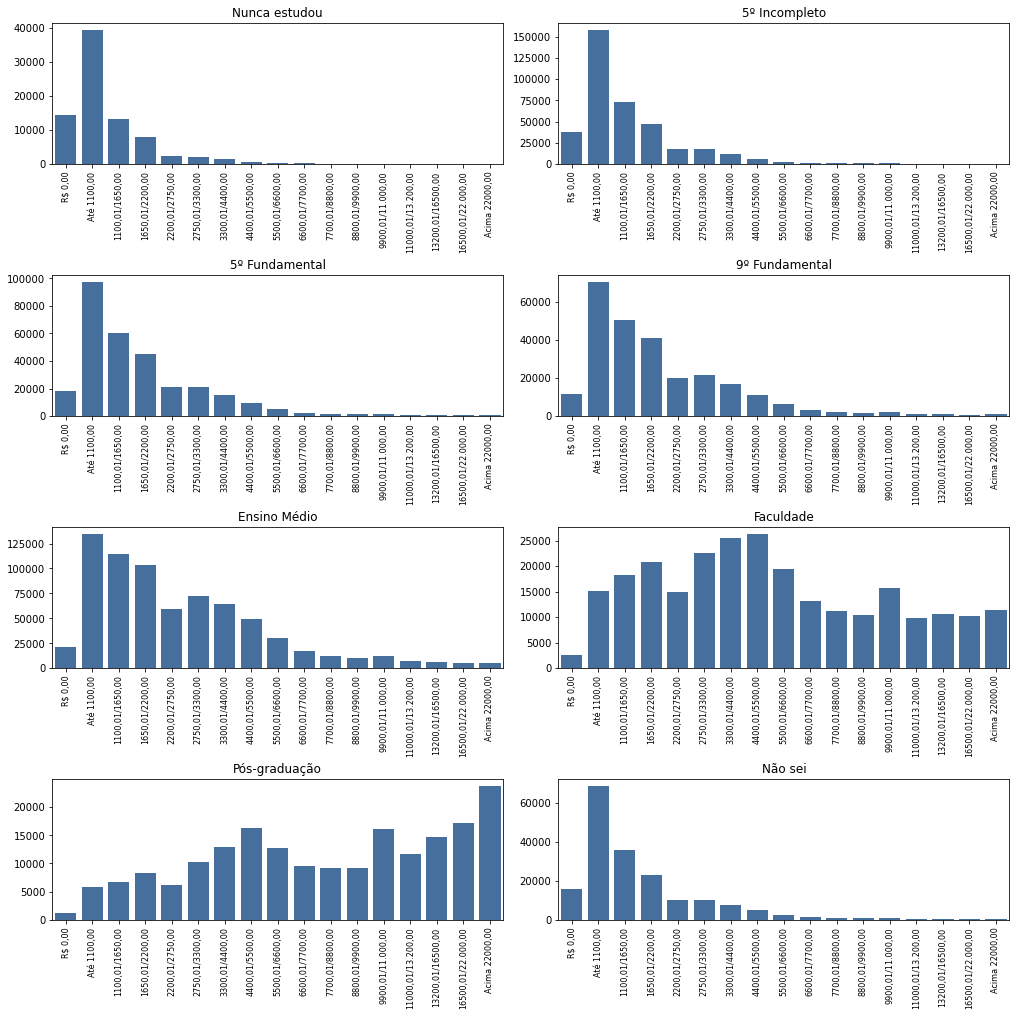



Avaliação da variação da Renda por Nível de Estudo do Responsável Mulher.


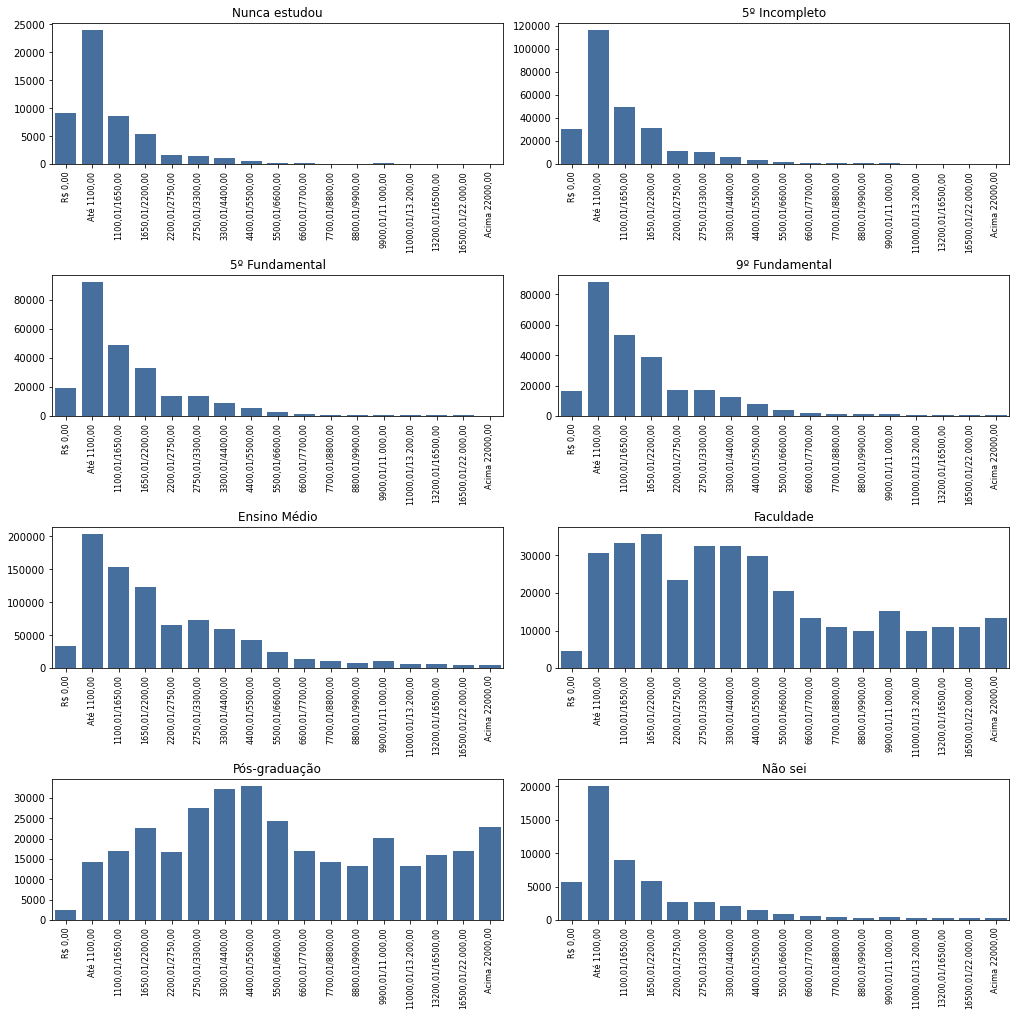

In [33]:
titulo = f'Avaliação da variação da Renda por Nível de Estudo do Responsável Homem.'
coluna_1 = 'Q001'                  # Classes
coluna_2 = 'Q006_FX'
base = base_Enm_21
bins = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']

vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))

Hist_Plot_sbn(coluna_1, coluna_2)

print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Renda por Nível de Estudo do Responsável Mulher.'
coluna_1 = 'Q002'                  # Classes


vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))

Hist_Plot_sbn(coluna_1, coluna_2)

print()
print('=======================================================================================================================')
print()

Avaliação da variação da Renda por Instituição de Ensino.


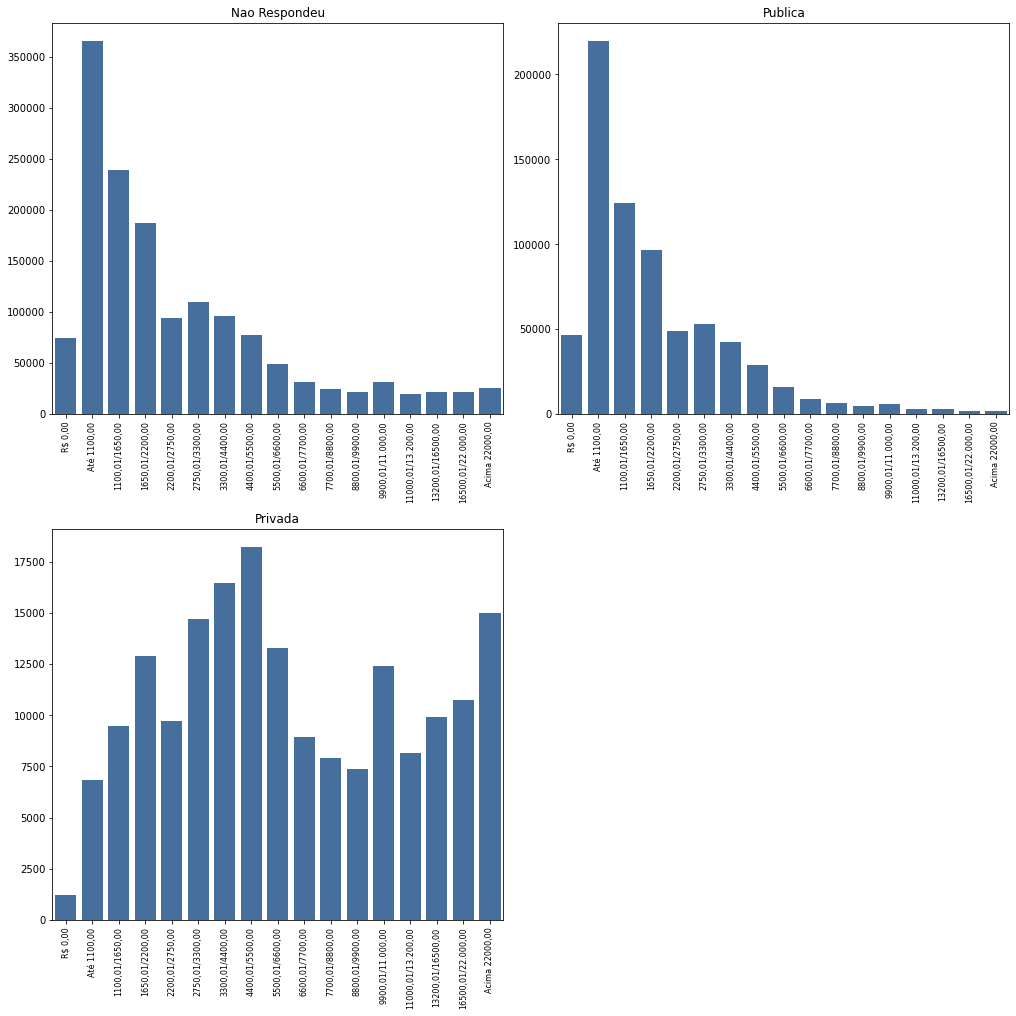

Nao respondeu Q006_FX
1100,01/1650,00       239485
11000,01/13.200,00     19963
13200,01/16500,00      21549
1650,01/2200,00       187608
16500,01/22.000,00     21553
2200,01/2750,00        94277
2750,01/3300,00       109437
3300,01/4400,00        96197
4400,01/5500,00        77271
5500,01/6600,00        49428
6600,01/7700,00        30915
7700,01/8800,00        24303
8800,01/9900,00        21712
9900,01/11.000,00      31590
Acima 22000,00         25818
Até 1100,00           365068
R$ 0,00                74795
Name: Q006_FX, dtype: int64 

Publica Q006_FX
1100,01/1650,00       124341
11000,01/13.200,00      3221
13200,01/16500,00       2856
1650,01/2200,00        96264
16500,01/22.000,00      2034
2200,01/2750,00        48719
2750,01/3300,00        53164
3300,01/4400,00        42314
4400,01/5500,00        28827
5500,01/6600,00        16112
6600,01/7700,00         9127
7700,01/8800,00         6498
8800,01/9900,00         4905
9900,01/11.000,00       5981
Acima 22000,00          1479
Até 

In [34]:
titulo = f'Avaliação da variação da Renda por Instituição de Ensino.'
coluna_1 = 'TP_ESCOLA'                  # Classes
coluna_2 = 'Q006_FX'
base = base_Enm_21
bins = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']

vrl_k = ['Nao Respondeu', 'Publica','Privada']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))

Hist_Plot_sbn(coluna_1, coluna_2)

print('Nao respondeu', base_Enm_21.loc[base_Enm_21.loc[:,'TP_ESCOLA'] == 1].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('Publica', base_Enm_21.loc[base_Enm_21.loc[:,'TP_ESCOLA'] == 2].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('Privada', base_Enm_21.loc[base_Enm_21.loc[:,'TP_ESCOLA'] == 3].groupby('Q006_FX')['Q006_FX'].count(), '\n')

print()
print('=======================================================================================================================')
print()

In [35]:
vrl_k = sorted(base['SG_UF_PROVA'].unique())
vrl_v = ['Norte', 'Nordeste', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Centro-Oeste', 
         'Nordeste', 'Sudeste', 'Centro-Oeste', 'Centro-Oeste', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Sul', 
         'Sudeste', 'Nordeste', 'Norte', 'Norte', 'Sul', 'Sul', 'Nordeste', 'Sudeste', 'Norte']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
base_Enm_21['SG_RG_PROVA'] = base_Enm_21['SG_UF_PROVA'].map(Dicionario_Labels)
base_Enm_21.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q014,Q019,Q022,Q024,Q025,Q006_FX,SG_RG_PROVA
1459959,210053297370,3,M,1,3,1,2,0,2,1.0,0,1504422.0,Marituba,15.0,PA,2.0,1.0,1.0,1504422,Marituba,15,PA,1,1,1,1,360.4,523.8,447.0,415.5,1,1.0,80.0,120.0,100.0,120.0,100.0,520.0,E,E,C,A,5.0,A,A,B,C,B,A,B,B,B,A,B,B,"R$ 0,00",Norte
1506781,210053066925,5,M,1,3,1,2,0,2,1.0,0,2109502.0,Riachão,21.0,MA,2.0,1.0,1.0,2101400,Balsas,21,MA,1,1,1,1,352.0,339.0,328.1,407.8,1,1.0,80.0,40.0,40.0,100.0,40.0,300.0,C,C,A,A,5.0,A,A,C,D,B,B,B,B,B,E,B,B,"R$ 0,00",Nordeste
166381,210054017773,14,M,1,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2111300,São Luís,21,MA,1,1,1,1,476.7,591.7,551.5,480.8,1,1.0,120.0,120.0,120.0,120.0,120.0,600.0,C,E,D,B,1.0,A,A,B,C,A,A,B,A,B,B,B,B,"R$ 0,00",Nordeste
2842712,210051835426,2,F,1,3,1,2,0,2,1.0,0,1505205.0,Oeiras do Pará,15.0,PA,2.0,1.0,1.0,1505205,Oeiras do Pará,15,PA,1,1,1,1,416.0,397.0,321.0,377.4,1,1.0,120.0,120.0,120.0,140.0,120.0,620.0,E,E,C,B,4.0,A,A,B,D,A,A,B,B,B,C,A,A,"R$ 0,00",Norte
2574548,210052145382,14,F,0,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,412.0,457.1,354.1,404.5,1,1.0,100.0,120.0,80.0,100.0,60.0,460.0,B,H,B,B,2.0,A,A,B,C,A,A,B,B,B,B,B,B,"R$ 0,00",Nordeste


Avaliação da variação da Renda por Região.


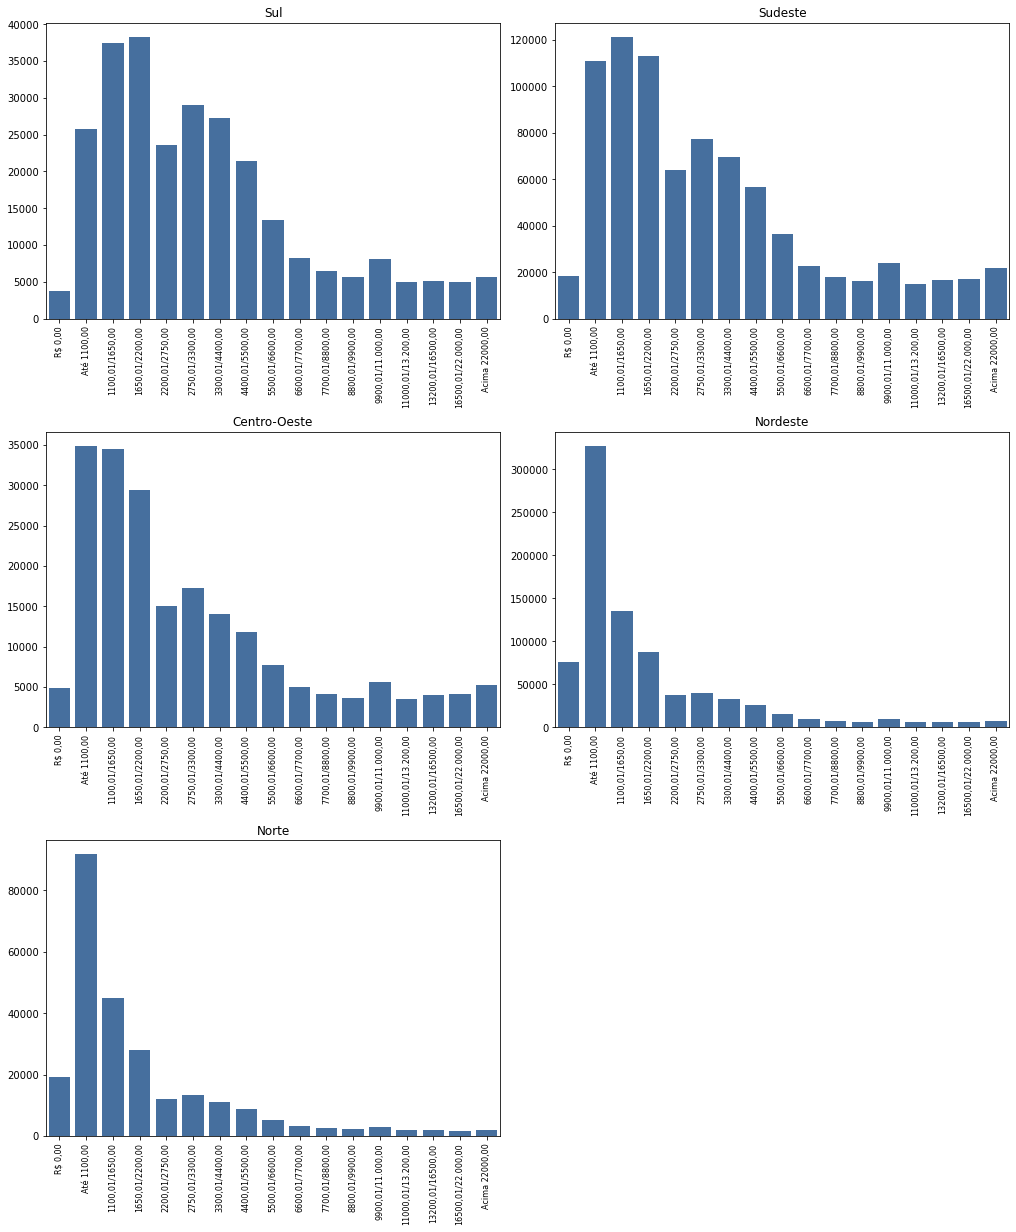

Sul Q006_FX
1100,01/1650,00       37415
11000,01/13.200,00     4909
13200,01/16500,00      5094
1650,01/2200,00       38281
16500,01/22.000,00     5006
2200,01/2750,00       23610
2750,01/3300,00       28979
3300,01/4400,00       27277
4400,01/5500,00       21461
5500,01/6600,00       13420
6600,01/7700,00        8284
7700,01/8800,00        6487
8800,01/9900,00        5600
9900,01/11.000,00      8071
Acima 22000,00         5617
Até 1100,00           25787
R$ 0,00                3724
Name: Q006_FX, dtype: int64 

Sudeste Q006_FX
1100,01/1650,00       121312
11000,01/13.200,00     14923
13200,01/16500,00      16826
1650,01/2200,00       112982
16500,01/22.000,00     16870
2200,01/2750,00        64196
2750,01/3300,00        77301
3300,01/4400,00        69496
4400,01/5500,00        56634
5500,01/6600,00        36384
6600,01/7700,00        22857
7700,01/8800,00        18097
8800,01/9900,00        16039
9900,01/11.000,00      23931
Acima 22000,00         21603
Até 1100,00           111015
R$

In [46]:
titulo = f'Avaliação da variação da Renda por Região.'
coluna_1 = 'SG_RG_PROVA'                  # Classes
coluna_2 = 'Q006_FX'
base = base_Enm_21
bins = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']

Dicionario_Labels = {}
UF_RG = ['Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte']
for i in UF_RG:
    Dicionario_Labels[i] = i

Hist_Plot_sbn(coluna_1, coluna_2)

print('Sul', base_Enm_21.loc[base_Enm_21.loc[:,'SG_RG_PROVA'] == 'Sul'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('Sudeste', base_Enm_21.loc[base_Enm_21.loc[:,'SG_RG_PROVA'] == 'Sudeste'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('Centro-Oeste', base_Enm_21.loc[base_Enm_21.loc[:,'SG_RG_PROVA'] == 'Centro-Oeste'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('Nordeste', base_Enm_21.loc[base_Enm_21.loc[:,'SG_RG_PROVA'] == 'Nordeste'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('Norte', base_Enm_21.loc[base_Enm_21.loc[:,'SG_RG_PROVA'] == 'Norte'].groupby('Q006_FX')['Q006_FX'].count(), '\n')

print()
print('=======================================================================================================================')
print()

Avaliação da variação da Renda por Quantidade de Computadores.


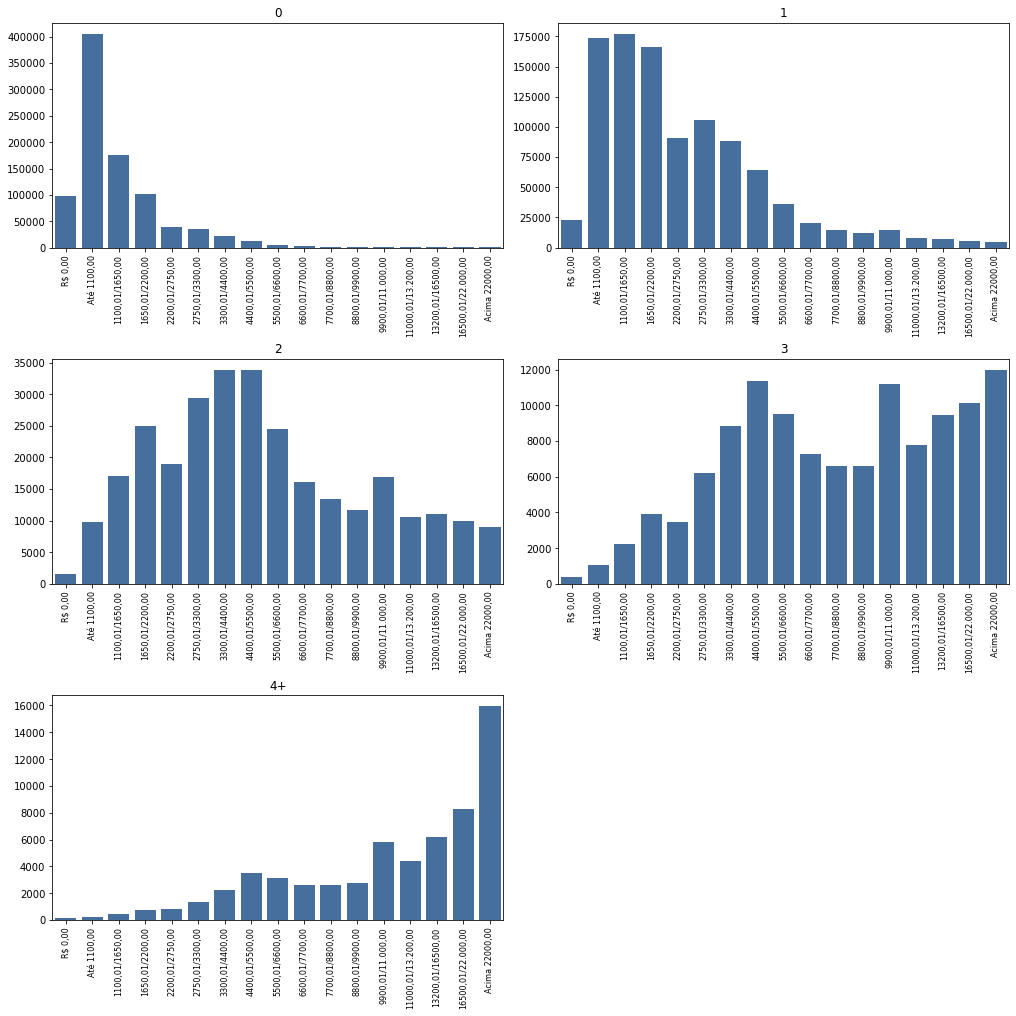

0 Computador Q006_FX
1100,01/1650,00       176144
11000,01/13.200,00       794
13200,01/16500,00        677
1650,01/2200,00       101193
16500,01/22.000,00       519
2200,01/2750,00        39168
2750,01/3300,00        34521
3300,01/4400,00        21421
4400,01/5500,00        11576
5500,01/6600,00         5608
6600,01/7700,00         2778
7700,01/8800,00         1790
8800,01/9900,00         1279
9900,01/11.000,00       1504
Acima 22000,00           475
Até 1100,00           406151
R$ 0,00                97913
Name: Q006_FX, dtype: int64 

1 Computador Q006_FX
1100,01/1650,00       177402
11000,01/13.200,00      7785
13200,01/16500,00       6967
1650,01/2200,00       165896
16500,01/22.000,00      5519
2200,01/2750,00        90396
2750,01/3300,00       105887
3300,01/4400,00        88709
4400,01/5500,00        63979
5500,01/6600,00        36110
6600,01/7700,00        20194
7700,01/8800,00        14360
8800,01/9900,00        11689
9900,01/11.000,00      14512
Acima 22000,00          4782


In [37]:
titulo = f'Avaliação da variação da Renda por Quantidade de Computadores.'
coluna_1 = 'Q024'                  # Classes
coluna_2 = 'Q006_FX'
base = base_Enm_21
bins = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']

vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))

Hist_Plot_sbn(coluna_1, coluna_2)

print('0 Computador', base_Enm_21.loc[base_Enm_21.loc[:,'Q024'] == 'A'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('1 Computador', base_Enm_21.loc[base_Enm_21.loc[:,'Q024'] == 'B'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('2 Computadores', base_Enm_21.loc[base_Enm_21.loc[:,'Q024'] == 'C'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('3 Computadores', base_Enm_21.loc[base_Enm_21.loc[:,'Q024'] == 'D'].groupby('Q006_FX')['Q006_FX'].count(), '\n')
print('4+ Computadores', base_Enm_21.loc[base_Enm_21.loc[:,'Q024'] == 'E'].groupby('Q006_FX')['Q006_FX'].count(), '\n')

print()
print('=======================================================================================================================')
print()

# Acesso a Internet

In [38]:
base_Enm_21 = base_Enm_21[base_Enm_21['Q024'].notnull()]
#base_Enm_21 = base_Enm_21.sort_values('Q022', ascending=True)
base_Enm_21.shape

(2386115, 57)

In [ ]:
# Esta função gera gráficos de Histograma, pelas classes das colunas desejadas.

def Hist_Plot (clmn_1, clmn_2):
    
    print(titulo)
    lst = ['0', '1', '2', '3', '4+']
    
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    figura = plt.figure(figsize=(15,5), constrained_layout=True)
    plt.rcParams['xtick.labelsize'] = 11
        
    fig_pos = 0
    
    for k, v in Dicionario_Labels.items():
        fig_pos += 1
        figura.add_subplot(qtd_lnh, 2, fig_pos)
        plt.hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15, rwidth=0.95)
        plt.title(k)
        plt.xticks(range(len(lst)), lst)
        plt.xticks(rotation=0)
        plt.ticklabel_format(style='plain', axis='y')
        
    plt.show()

In [39]:
# Esta função gera gráficos de Histograma, pelas classes das colunas desejadas.

def Hist_Plot_sbn (clmn_1, clmn_2):
    
    print(titulo)
    lst = ['0', '1', '2', '3', '4+']
    
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    figura = plt.figure(figsize=(15,5), constrained_layout=True)
    plt.rcParams['xtick.labelsize'] = 8
        
    fig_pos = 0
    
    for k, v in Dicionario_Labels.items():
        fig_pos += 1
        figura.add_subplot(qtd_lnh, 2, fig_pos)
        sbn.countplot(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], color='#376ead', order=bins )
        plt.title(k)
        plt.xticks(range(len(lst)), lst)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain', axis='y')
        plt.xlabel("")
        plt.ylabel("")
        
    plt.show()

Avaliação do acesso a internet por celular disponível


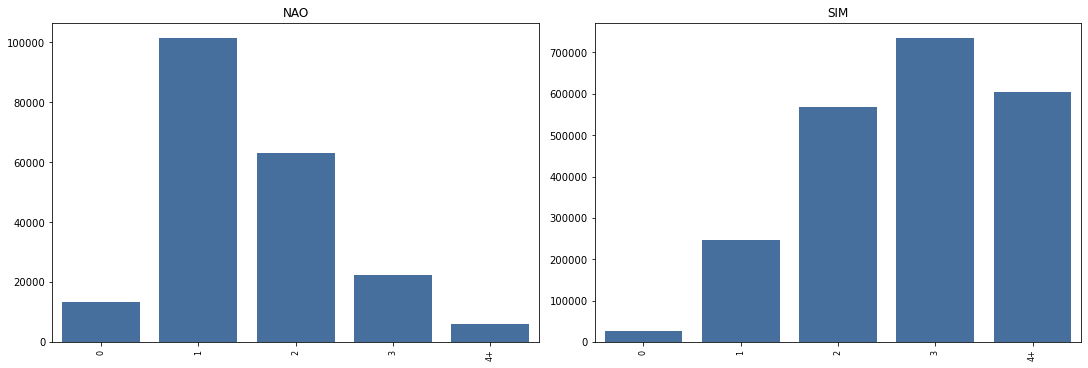

NAO Internet Q022
A     13276
B    101408
C     63039
D     22435
E      6152
Name: Q022, dtype: int64 

SIM Internet Q022
A     27527
B    246070
C    567713
D    734817
E    603678
Name: Q022, dtype: int64




In [40]:
titulo = f'Avaliação do acesso a internet por celular disponível'
coluna_1 = 'Q025'                  # Classes
coluna_2 = 'Q022'
base = base_Enm_21
bins = ['A', 'B', 'C', 'D', 'E']

Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}

Hist_Plot_sbn(coluna_1, coluna_2)

print('NAO Internet', base_Enm_21.loc[base_Enm_21.loc[:,'Q025'] == 'A'].groupby('Q022')['Q022'].count(), '\n')
print('SIM Internet', base_Enm_21.loc[base_Enm_21.loc[:,'Q025'] == 'B'].groupby('Q022')['Q022'].count())

print()
print('=======================================================================================================================')
print()

Avaliação do acesso a internet por computador disponível


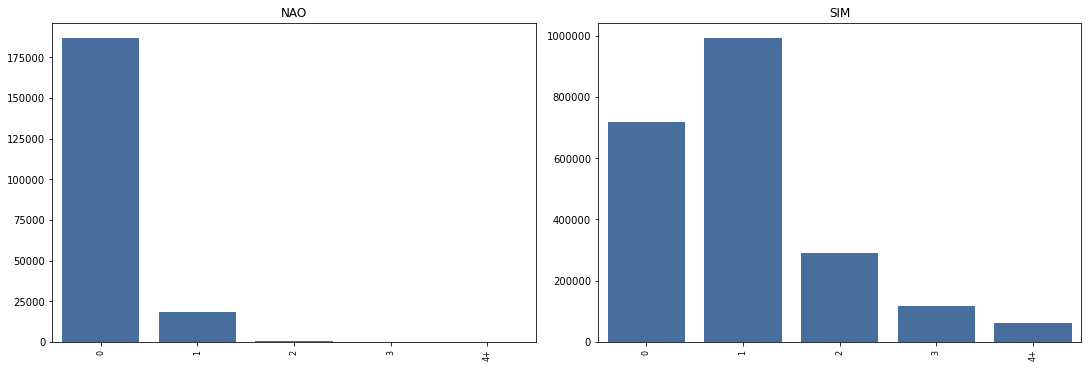

NAO Internet Q024
A    186801
B     18700
C       676
D        93
E        40
Name: Q024, dtype: int64 

SIM Internet Q024
A    716710
B    992191
C    291834
D    117846
E     61224
Name: Q024, dtype: int64




In [41]:
titulo = f'Avaliação do acesso a internet por computador disponível'
coluna_1 = 'Q025'                  # Classes
coluna_2 = 'Q024'
base = base_Enm_21
bins = ['A', 'B', 'C', 'D', 'E']

Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}

Hist_Plot_sbn(coluna_1, coluna_2)

print('NAO Internet', base_Enm_21.loc[base_Enm_21.loc[:,'Q025'] == 'A'].groupby('Q024')['Q024'].count(), '\n')
print('SIM Internet', base_Enm_21.loc[base_Enm_21.loc[:,'Q025'] == 'B'].groupby('Q024')['Q024'].count())

print()
print('=======================================================================================================================')
print()